In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon, gaussian_kde, pearsonr, kstest, zscore,percentileofscore
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2
STIM_COLOR = '#938D6D'#'#E8CA17'
CHOICE_COLOR = '#ED8B6A'#'#85936D'#'#9DE817'

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'
passivedecodingfilename = 'D:\\stimdecoding_25s_passive.csv'
choicedecodingfilename = 'D:\\choicedecoding.csv'


stdfont = 14
stdyfrac = 0.06

current_version = 0 #June 22nd, 2023
current_version = 1 #October 11th, 2023
current_version = 2 #October 11th, 2023

In [2]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for DS_19
Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
Fetching files for AE_301
Fetching files for AE_312
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
Error loading P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from file
P:\Behavioor\BS_123\

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

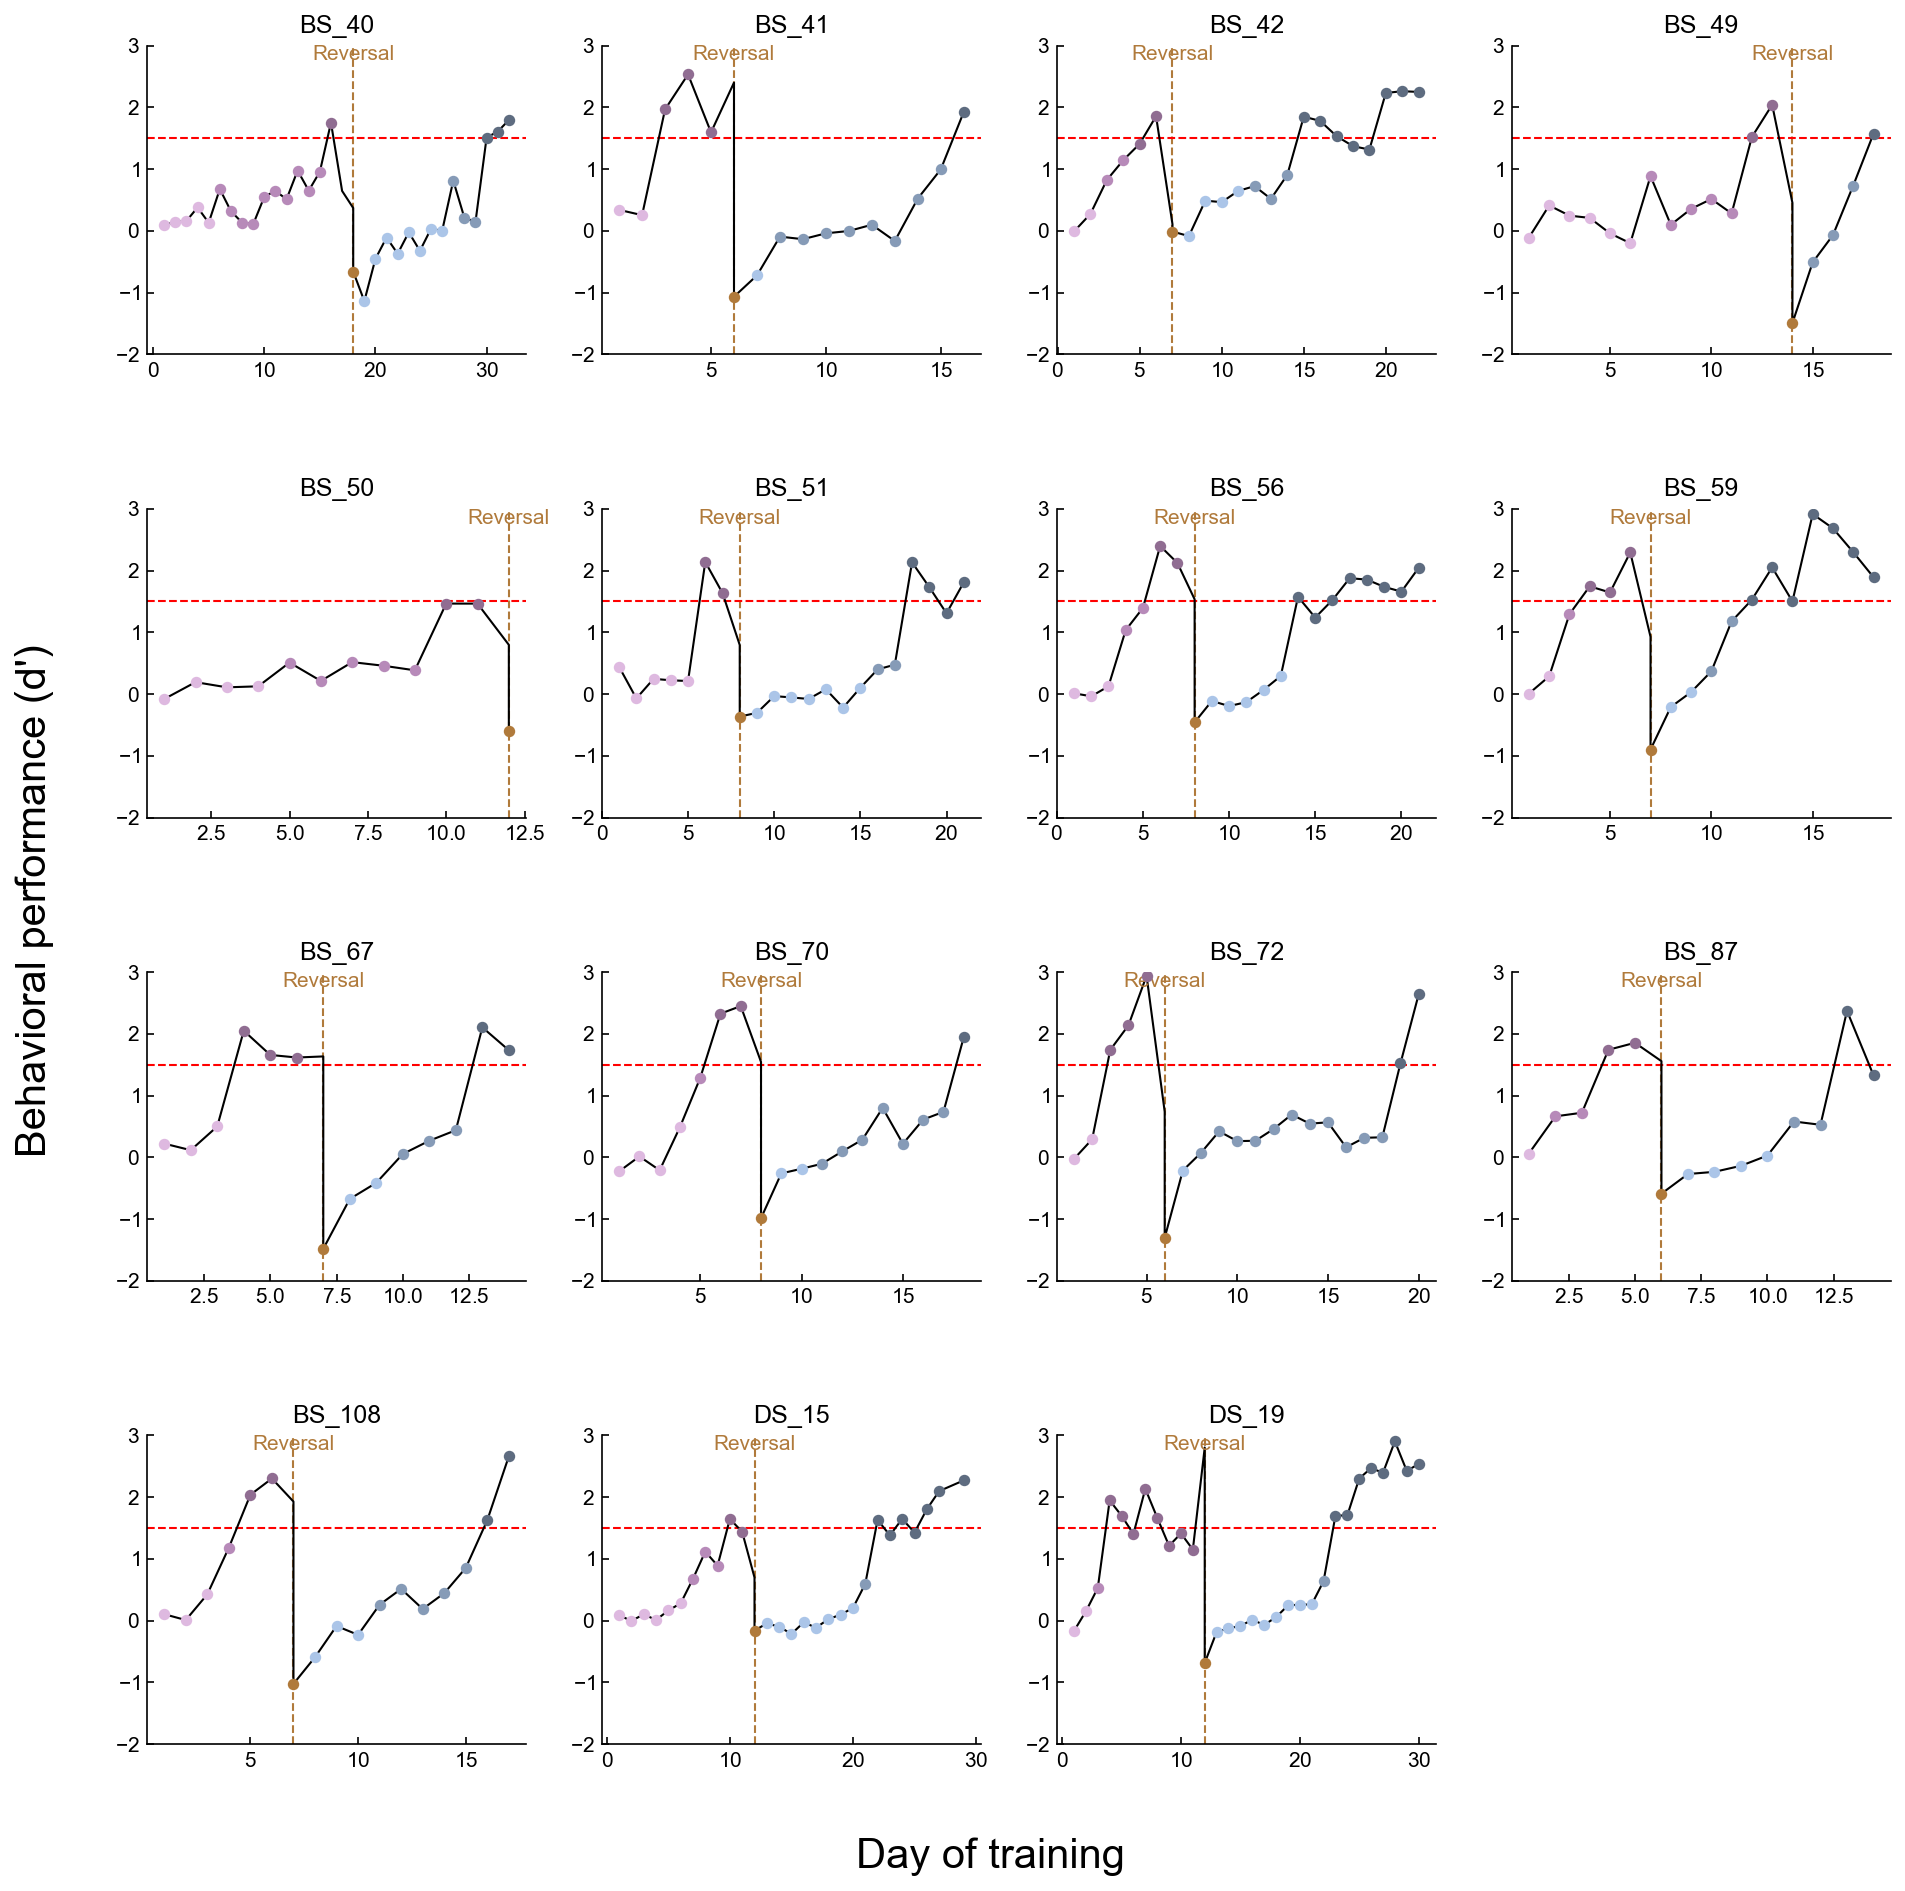

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
#plt.savefig(os.path.join('D:\\\\TempFigures','All ephys animals learning phases.pdf'),transparent=False,facecolor="white")

In [5]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no behavior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 740/740 [00:08<00:00, 87.29it/s] 


In [6]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1829/1829 [00:28<00:00, 63.66it/s] 

errors for: []


# Load Decoding Data

In [7]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')

In [8]:
stim_acc = []
choice_acc = []
stim_acc_c = []
choice_acc_c = []
stim_acc_s = []
choice_acc_s = []
pval_stim_s = []
pval_choice_s = []
pval_stim_c = []
pval_choice_c = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_accuracy = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response','pval_synthetic_control')
    
    pvalue_stim_c = 0.01#getDataPoint(dec_df,session,clust,'stimulus','pval_shuffled_control')
    pvalue_choice_c = 0.01#getDataPoint(dec_df,session,clust,'response','pval_shuffled_control')
    
    stim_acc.append(stim_accuracy)
    choice_acc.append(choice_accuracy)
    
    pval_stim_s.append(pvalue_stim_s)
    pval_choice_s.append(pvalue_choice_s)
    
    pval_stim_c.append(pvalue_stim_c)
    pval_choice_c.append(pvalue_choice_c)
    
stim_acc = np.array(stim_acc)
choice_acc = np.array(choice_acc)
pval_stim_s = np.array(pval_stim_s)
pval_choice_s = np.array(pval_choice_s)
pval_stim_c = np.array(pval_stim_c)
pval_choice_c = np.array(pval_choice_c)

1829it [00:08, 223.38it/s]


In [9]:
def get_TE_mask(acc,pval_s):#,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    #is_valid_pval = np.logical_and(np.less(pval_s,0.05) , np.less(pval_c,0.05))
    is_valid_pval = np.less(pval_s,0.05)
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_s,task_encoder_threshold_s = get_TE_mask(stim_acc,pval_stim_s)#,pval_stim_c)
is_TE_c,task_encoder_threshold_c = get_TE_mask(choice_acc,pval_choice_s)#,pval_choice_c)

Task encoder threshold: 0.55951845
Task encoder threshold: 0.5933088768115942


In [10]:
print('checkpoint')

checkpoint


In [14]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

ChoiceMod_preearly = []
ChoiceMod_prelate = []
ChoiceMod_preexpert = []
ChoiceMod_postearly = []
ChoiceMod_postlate = []
ChoiceMod_postexpert = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

FR_CR_evoked = [0,0,0,0,0,0]
FR_CR_suppressed = [0,0,0,0,0,0]
FR_CR_choice_evoked = [0,0,0,0,0,0]
FR_CR_choice_suppressed = [0,0,0,0,0,0]
FR_NCR = [0,0,0,0,0,0]
FR_NCR_choice = [0,0,0,0,0,0]

CR_NCR_StimThresh = 3.5#2.9034419036315477
CR_NCR_ChoiceThresh = 0.8308610286728099#1.1059872908523893

cellstouseFR = 'all cells'
# cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not is_TE_s[idx]:#np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
            
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        FRbl = sessionfile.responsiveness[clust]['all_trials'].FRbaseline
        FR = sessionfile.responsiveness[clust]['all_trials'].FR
    except Exception as e:
        print(f"stim: {e}")
        FRmod = np.nan
        FRbl = np.nan
        FR = np.nan
    try:
        ChoiceMod = np.abs(sessionfile.responsiveness[clust]['all_trials'].FRmodulation_choice)
        FR_choice = sessionfile.responsiveness[clust]['all_trials'].FR_choice
    except Exception as e:
        print(f"choice: {e}")
        ChoiceMod = np.nan
        FR_choice = np.nan
        
    # if FRmod < CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
    #     FRmod = np.nan
    #     ChoiceMod = np.nan
        
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(FRmod)
        ChoiceMod_preearly.append(ChoiceMod)
        preearly_animals.append(sessionfile.meta.animal)
        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[0] += 1
            else:
                FR_CR_suppressed[0] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[0] += 1
        if ChoiceMod > CR_NCR_ChoiceThresh:
            if FR_choice>FRbl:
                FR_CR_choice_evoked[0] += 1
            else:
                FR_CR_choice_suppressed[0] += 1
        elif ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_choice[0] += 1
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(FRmod)
        ChoiceMod_prelate.append(ChoiceMod)
        prelate_animals.append(sessionfile.meta.animal)
        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[1] += 1
            else:
                FR_CR_suppressed[1] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[1] += 1
        if ChoiceMod > CR_NCR_ChoiceThresh:
            if FR_choice>FRbl:
                FR_CR_choice_evoked[1] += 1
            else:
                FR_CR_choice_suppressed[1] += 1
        elif ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_choice[1] += 1
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(FRmod)
        ChoiceMod_preexpert.append(ChoiceMod)
        preexpert_animals.append(sessionfile.meta.animal)
        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[2] += 1
            else:
                FR_CR_suppressed[2] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[2] += 1
        if ChoiceMod > CR_NCR_ChoiceThresh:
            if FR_choice>FRbl:
                FR_CR_choice_evoked[2] += 1
            else:
                FR_CR_choice_suppressed[2] += 1
        elif ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_choice[2] += 1
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(FRmod)
        ChoiceMod_postearly.append(ChoiceMod)
        postearly_animals.append(sessionfile.meta.animal)
        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[3] += 1
            else:
                FR_CR_suppressed[3] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[3] += 1
        if ChoiceMod > CR_NCR_ChoiceThresh:
            if FR_choice>FRbl:
                FR_CR_choice_evoked[3] += 1
            else:
                FR_CR_choice_suppressed[3] += 1
        elif ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_choice[3] += 1
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(FRmod)
        ChoiceMod_postlate.append(ChoiceMod)
        postlate_animals.append(sessionfile.meta.animal)
        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[4] += 1
            else:
                FR_CR_suppressed[4] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[4] += 1
        if ChoiceMod > CR_NCR_ChoiceThresh:
            if FR_choice>FRbl:
                FR_CR_choice_evoked[4] += 1
            else:
                FR_CR_choice_suppressed[4] += 1
        elif ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_choice[4] += 1
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(FRmod)
        ChoiceMod_postexpert.append(ChoiceMod)
        postexpert_animals.append(sessionfile.meta.animal)
        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[5] += 1
            else:
                FR_CR_suppressed[5] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[5] += 1
        if ChoiceMod > CR_NCR_ChoiceThresh:
            if FR_choice>FRbl:
                FR_CR_choice_evoked[5] += 1
            else:
                FR_CR_choice_suppressed[5] += 1
        elif ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_choice[5] += 1

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

ChoiceMod_preearly = np.array(ChoiceMod_preearly)
ChoiceMod_prelate = np.array(ChoiceMod_prelate)
ChoiceMod_preexpert = np.array(ChoiceMod_preexpert)
ChoiceMod_postearly = np.array(ChoiceMod_postearly)
ChoiceMod_postlate = np.array(ChoiceMod_postlate)
ChoiceMod_postexpert = np.array(ChoiceMod_postexpert)

1388it [00:23, 52.30it/s] 

choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'


1403it [00:23, 61.68it/s]

choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodul

1423it [00:23, 79.31it/s]

choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'


1829it [00:30, 60.95it/s] 


In [135]:
def non_para_norm(distribution,data):
    distribution = ilep.rmnan(distribution)
#     data = ilep.rmnan(distribution)
    if type(data) == int or type(data) == float or type(data) == np.int64 or type(data) == np.float64:
        return percentileofscore(distribution,data)
    else:
        result = [percentileofscore(distribution,d) for d in data]
        return np.array(result)

In [95]:
#Normality test
FRmod_data = ilep.rmnan(np.log10(np.concatenate(np.array([FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]))))
ChoiceMod_data = ilep.rmnan(np.log10(np.concatenate(np.array([ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert]))))

mean_stim = np.mean(FRmod_data)
std_stim = np.std(FRmod_data)
mean_choice = np.mean(ChoiceMod_data)
std_choice = np.std(ChoiceMod_data)

stim_norm = zscore(np.log10(stim_mod))
test = kstest(np.random.normal,stim_mod)
print(test)

choice_norm = zscore(np.log10(choice_mod))
test = kstest(np.random.normal,choice_mod)
print(test)

KstestResult(statistic=0.611660777385159, pvalue=3.283408497297578e-07)
KstestResult(statistic=0.55, pvalue=8.13688745059213e-06)


<ipython-input-95-0265142aca55>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  FRmod_data = ilep.rmnan(np.log10(np.concatenate(np.array([FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]))))
<ipython-input-95-0265142aca55>:2: RuntimeWarning: divide by zero encountered in log10
  FRmod_data = ilep.rmnan(np.log10(np.concatenate(np.array([FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]))))
<ipython-input-95-0265142aca55>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndar

In [136]:
StimChoiceIndex_preearly = []
StimChoiceIndex_prelate = []
StimChoiceIndex_preexpert = []
StimChoiceIndex_postearly = []
StimChoiceIndex_postlate = []
StimChoiceIndex_postexpert = []

CR_NCR_StimThresh = 3.5#2.9034419036315477
CR_NCR_ChoiceThresh = 0.8308610286728099#1.1059872908523893

FRmod_dist = np.concatenate(np.array([FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]))
ChoiceMod_dist = np.concatenate(np.array([ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert]))

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
            
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    except Exception as e:
        print(f"stim: {e}")
        FRmod = np.nan
    try:
        ChoiceMod = np.abs(sessionfile.responsiveness[clust]['all_trials'].FRmodulation_choice)
    except Exception as e:
        print(f"choice: {e}")
        ChoiceMod = np.nan
        
    FRmod_og = FRmod
    ChoiceMod_og = ChoiceMod
        
    FRmod = non_para_norm(FRmod_dist,FRmod)
    ChoiceMod = non_para_norm(ChoiceMod_dist,ChoiceMod)
        
    StimChoice_index = (FRmod-ChoiceMod)/(FRmod+ChoiceMod)
    if FRmod_og < CR_NCR_StimThresh and ChoiceMod_og < CR_NCR_ChoiceThresh:     # Some-kind-of-CR only!
        StimChoice_index = np.nan
        # Only perform this analysis for cells that are some kind of CR because an NCR shouldn't count as 'multiplexed'
        
    if EILphases[idx] == 'pre early':
        StimChoiceIndex_preearly.append(StimChoice_index)
    elif EILphases[idx] == 'pre late':
        StimChoiceIndex_prelate.append(StimChoice_index)
    elif EILphases[idx] == 'pre expert':
        StimChoiceIndex_preexpert.append(StimChoice_index)
    elif EILphases[idx] == 'post early':
        StimChoiceIndex_postearly.append(StimChoice_index)
    elif EILphases[idx] == 'post late':
        StimChoiceIndex_postlate.append(StimChoice_index)
    elif EILphases[idx] == 'post expert':
        StimChoiceIndex_postexpert.append(StimChoice_index)

StimChoiceIndex_preearly = np.array(StimChoiceIndex_preearly)
StimChoiceIndex_prelate = np.array(StimChoiceIndex_prelate)
StimChoiceIndex_preexpert = np.array(StimChoiceIndex_preexpert)
StimChoiceIndex_postearly = np.array(StimChoiceIndex_postearly)
StimChoiceIndex_postlate = np.array(StimChoiceIndex_postlate)
StimChoiceIndex_postexpert = np.array(StimChoiceIndex_postexpert)

<ipython-input-136-fc7c109df44b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  FRmod_dist = np.concatenate(np.array([FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]))
<ipython-input-136-fc7c109df44b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ChoiceMod_dist = np.concatenate(np.array([ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert]))
1391it [00:21, 68.09it/s] 

choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodul

1409it [00:21, 77.00it/s]

choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'


1429it [00:22, 76.50it/s]

choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'


1830it [00:28, 65.18it/s] 


In [20]:
print(FR_CR_evoked)
print(FR_CR_suppressed)
print(FR_CR_choice_evoked)
print(FR_CR_choice_suppressed)
print(FR_NCR)
print(FR_NCR_choice)

[67, 60, 36, 156, 93, 85]
[8, 13, 11, 14, 9, 12]
[27, 61, 40, 110, 108, 91]
[21, 39, 16, 46, 35, 45]
[73, 114, 50, 179, 197, 171]
[100, 87, 41, 193, 156, 105]


# Multiplexing Index - should plot only for either Stim or Choice CRs

0.3052849435613986
-0.14405839016857347
-0.07898461115128994
0.08191484853013667
-0.1937470383762021
-0.2578654495692033


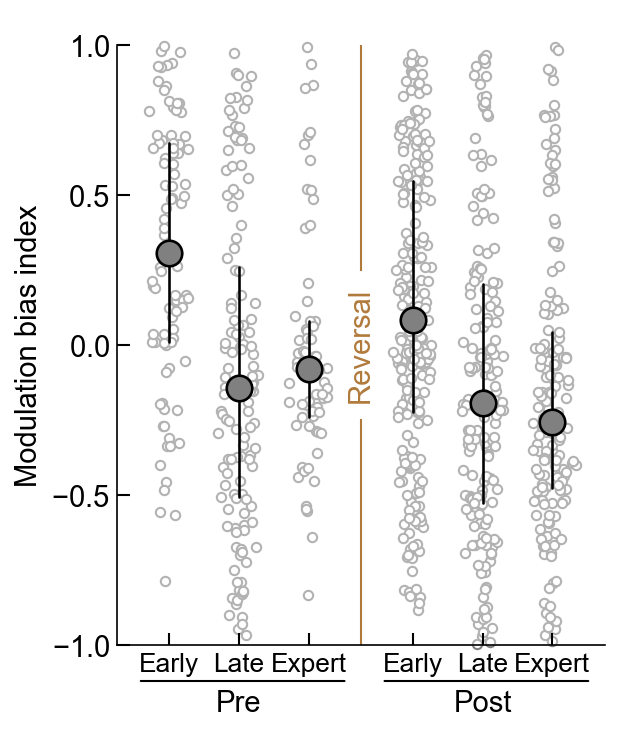

In [141]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
data_FRmod = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
data = [StimChoiceIndex_preearly,StimChoiceIndex_prelate,StimChoiceIndex_preexpert,StimChoiceIndex_postearly,StimChoiceIndex_postlate,StimChoiceIndex_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

###
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]
X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
# X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)
colors = CR_COLOR#NCR_CR_cmap( (np.concatenate(data_FRmod)-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10,clip_on=False)
# ax.set_yscale('log',subs=[])

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= CR_COLOR#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)

    print(median)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')


################################################################################################################
labels = ['Early','Late','Expert','Early','Late','Expert']

# ax.set_ylim([0.1,200])
# ax.set_yticks([0.1,1,10,100])
# ax.set_yticklabels(['0.1','1','10','100'])
# ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_ylim([-1,1])
ylab = ax.set_ylabel('Modulation bias index')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.475, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

Y = np.mean(ax.get_ylim())
# Y = 10**np.mean(np.log10(ax.get_ylim()))
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]*2]*2,color='white',alpha=0.4,zorder=-5,clip_on=False)

ttl = ax.set_title(' ')
artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Multiplexing index CRs over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

0.3052849435613986
-0.14405839016857347
-0.07898461115128994
0.08191484853013667
-0.1937470383762021
-0.2578654495692033


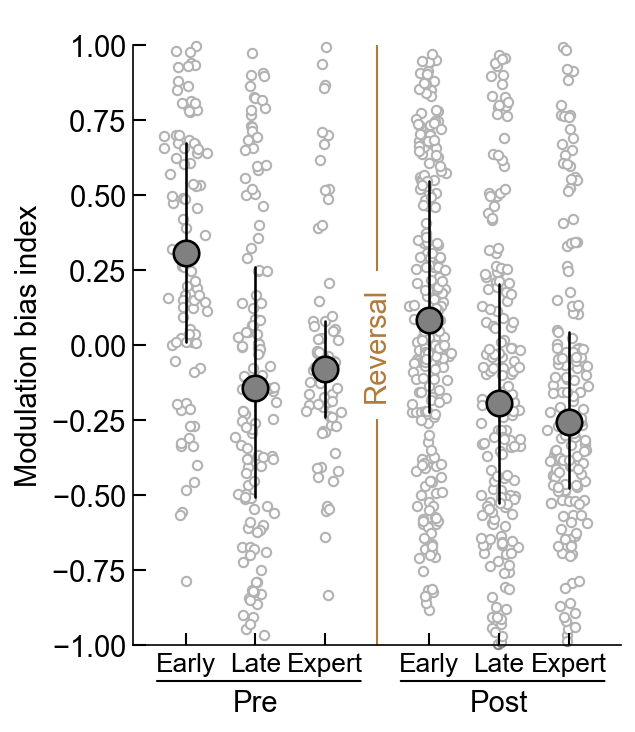

In [147]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
data_FRmod = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
data = [StimChoiceIndex_preearly,StimChoiceIndex_prelate,StimChoiceIndex_preexpert,StimChoiceIndex_postearly,StimChoiceIndex_postlate,StimChoiceIndex_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

###
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]
X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
# X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)
colors = CR_COLOR#NCR_CR_cmap( (np.concatenate(data_FRmod)-(mn-spread/2))/ (spread) )

ax.scatter(X, (Y), s=size, ec=colors, fc='white', lw=1,zorder=-10,clip_on=False)
# ax.set_yscale('log',subs=[])

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = (ilep.rmnan(column))
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= CR_COLOR#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)

    print(median)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')


################################################################################################################
labels = ['Early','Late','Expert','Early','Late','Expert']

# ax.set_ylim([0.1,200])
# ax.set_yticks([0.1,1,10,100])
# ax.set_yticklabels(['0.1','1','10','100'])
# ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')
# ax.set_yticks([0,0.25,0.5,0.75,1])
# ax.set_ylim([0,1])
ax.set_yticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_ylim([-1,1])
ylab = ax.set_ylabel('Modulation bias index')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.475, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

Y = np.mean(ax.get_ylim())
# Y = 10**np.mean(np.log10(ax.get_ylim()))
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]*2]*2,color='white',alpha=0.4,zorder=-5,clip_on=False)

ttl = ax.set_title(' ')
artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Multiplexing index CRs over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [148]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(StimChoiceIndex_preearly)
data_dec.prelate = np.abs(StimChoiceIndex_prelate)
data_dec.preexpert = np.abs(StimChoiceIndex_preexpert)
data_dec.postearly = np.abs(StimChoiceIndex_postearly)
data_dec.postlate = np.abs(StimChoiceIndex_postlate)
data_dec.postexpert = np.abs(StimChoiceIndex_postexpert)
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
# ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source         SS      DF        MS         F     p-unc       np2
0            phase   0.294136     3.0  0.098045  1.206438  0.306130  0.003168
1          context   0.093347     1.0  0.093347  1.148627  0.284064  0.001007
2  phase * context   0.962550     3.0  0.320850  3.948027  0.008145  0.010292
3         Residual  92.564796  1139.0  0.081268       NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.600636  0.800848  0.071005
8     post-late  baseline  experimental  0.324429  0.648857 -0.098955
9    pre-expert  baseline  experimental  0.001129  0.004515  0.521684
10     pre-late  baseline  experimental  0.900204  0.900204 -0.011577
key preearly has 90 non-nan elements
key prelate has 128 non-nan elements
key preexpert has 66 non-nan elements
key postearly has 227 non-nan elements
key postlate has 174 non-nan elements
key postexpert has 160 non-nan elements


In [149]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(StimChoiceIndex_preearly)
data_dec.prelate = np.abs(StimChoiceIndex_prelate)
data_dec.preexpert = np.abs(StimChoiceIndex_preexpert)
data_dec.postearly = np.abs(StimChoiceIndex_postearly)
data_dec.postlate = np.abs(StimChoiceIndex_postlate)
data_dec.postexpert = np.abs(StimChoiceIndex_postexpert)
# ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source         SS      DF        MS         F     p-unc       np2
0            phase   0.391739     3.0  0.130580  1.615961  0.183909  0.004183
1          context   0.010299     1.0  0.010299  0.127456  0.721150  0.000110
2  phase * context   0.862860     3.0  0.287620  3.559379  0.013881  0.009168
3         Residual  93.250364  1154.0  0.080806       NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.761786  0.900204 -0.030134
8     post-late  baseline  experimental  0.324429  0.648857 -0.098955
9    pre-expert  baseline  experimental  0.002857  0.011429  0.509748
10     pre-late  baseline  experimental  0.900204  0.900204 -0.011577
key preearly has 90 non-nan elements
key prelate has 128 non-nan elements
key preexpert has 66 non-nan elements
key postearly has 227 non-nan elements
key postlate has 174 non-nan elements
key postexpert has 160 non-nan elements


In [150]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(np.abs(StimChoiceIndex_preearly))
data_dec.prelate = np.abs(np.abs(StimChoiceIndex_prelate))
data_dec.preexpert = np.abs(np.abs(StimChoiceIndex_preexpert))
data_dec.postearly = np.abs(np.abs(StimChoiceIndex_postearly))
data_dec.postlate = np.abs(np.abs(StimChoiceIndex_postlate))
data_dec.postexpert = np.abs(np.abs(StimChoiceIndex_postexpert))
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
# ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source         SS      DF        MS         F     p-unc       np2
0            phase   0.294136     3.0  0.098045  1.206438  0.306130  0.003168
1          context   0.093347     1.0  0.093347  1.148627  0.284064  0.001007
2  phase * context   0.962550     3.0  0.320850  3.948027  0.008145  0.010292
3         Residual  92.564796  1139.0  0.081268       NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.600636  0.800848  0.071005
8     post-late  baseline  experimental  0.324429  0.648857 -0.098955
9    pre-expert  baseline  experimental  0.001129  0.004515  0.521684
10     pre-late  baseline  experimental  0.900204  0.900204 -0.011577
key preearly has 90 non-nan elements
key prelate has 128 non-nan elements
key preexpert has 66 non-nan elements
key postearly has 227 non-nan elements
key postlate has 174 non-nan elements
key postexpert has 160 non-nan elements


In [151]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(np.abs(StimChoiceIndex_preearly))
data_dec.prelate = np.abs(np.abs(StimChoiceIndex_prelate))
data_dec.preexpert = np.abs(np.abs(StimChoiceIndex_preexpert))
data_dec.postearly = np.abs(np.abs(StimChoiceIndex_postearly))
data_dec.postlate = np.abs(np.abs(StimChoiceIndex_postlate))
data_dec.postexpert = np.abs(np.abs(StimChoiceIndex_postexpert))
# ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source         SS      DF        MS         F     p-unc       np2
0            phase   0.391739     3.0  0.130580  1.615961  0.183909  0.004183
1          context   0.010299     1.0  0.010299  0.127456  0.721150  0.000110
2  phase * context   0.862860     3.0  0.287620  3.559379  0.013881  0.009168
3         Residual  93.250364  1154.0  0.080806       NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.761786  0.900204 -0.030134
8     post-late  baseline  experimental  0.324429  0.648857 -0.098955
9    pre-expert  baseline  experimental  0.002857  0.011429  0.509748
10     pre-late  baseline  experimental  0.900204  0.900204 -0.011577
key preearly has 90 non-nan elements
key prelate has 128 non-nan elements
key preexpert has 66 non-nan elements
key postearly has 227 non-nan elements
key postlate has 174 non-nan elements
key postexpert has 160 non-nan elements


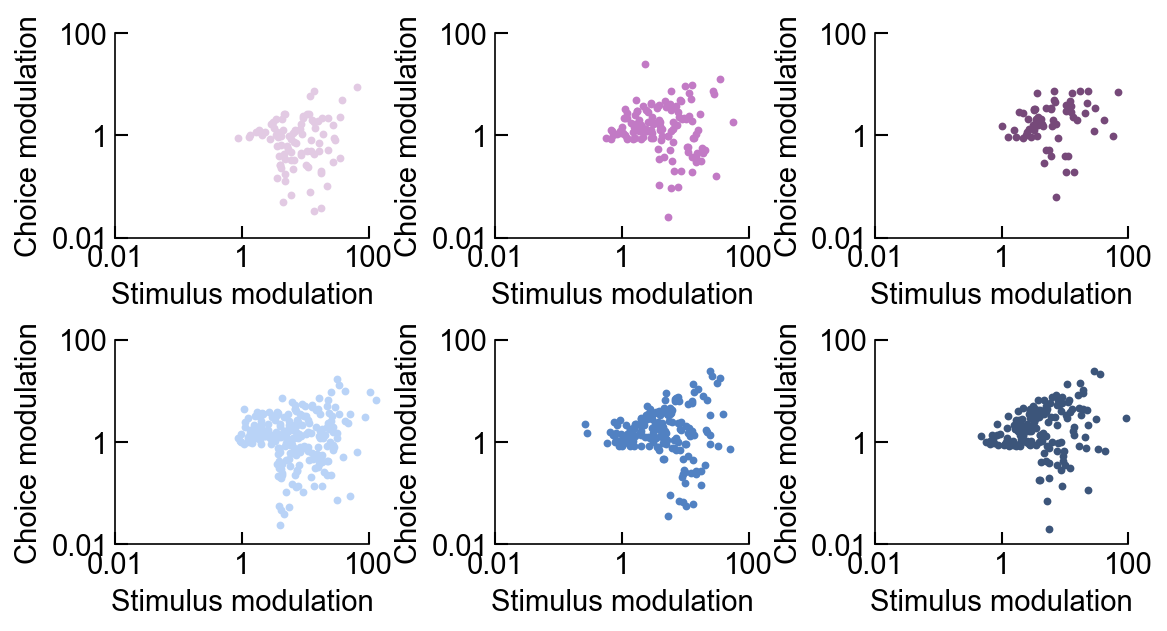

In [117]:
FRmod_data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
ChoiceMod_data = [ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert]

def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],hspace=0.5,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)

################################################################################################################

size = 20
summary_size=100
summary_width=1#0.75

mn = 3.5
spread = 2.5
    
############

for idx,(ax,stim_mod,choice_mod) in enumerate(zip(axs,FRmod_data,ChoiceMod_data)):
    ax.scatter(stim_mod,choice_mod,clip_on=False,s=7.5,c=PHASE_COLORS[idx])

################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.set_xticks([])
#     ax.set_yticks([])
    ax.set_xscale('log',subs=[])
    ax.set_yscale('log',subs=[])
    ax.set_xlim([0.01,100])
    ax.set_ylim([0.01,100])
    ax.set_xticks([0.01,1,100])
    ax.set_yticks([0.01,1,100])
    ax.set_xticklabels(['0.01','1','100'])
    ax.set_yticklabels(['0.01','1','100'])
    ax.set_xlabel('Stimulus modulation')
    ax.set_ylabel('Choice modulation')
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
#     for item in (ax.get_xticklabels()):
#         item.set_fontsize(stdfont*0.9)
#         pass

#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = []
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Multiplexing all cells over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [118]:
for ax,stim_mod,choice_mod in zip(axs,FRmod_data,ChoiceMod_data):
    ###
    X,Y = ilep.paired_rmnan(stim_mod,choice_mod)
    stat,pval = pearsonr(X,Y)
    print(pval*6)

5.6631090562543244e-05
1.0448654368280947
0.1268892965051159
3.271522147507508e-06
3.6335685981141233e-06
0.00071685988995754


In [11]:
FRmod_data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
ChoiceMod_data = [ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert]

In [12]:
[np.mean(np.less(FR,3.5))*100 for FR in FRmod_data]

[49.32432432432432,
 60.63829787234043,
 42.73504273504273,
 51.28939828080229,
 65.88628762541806,
 60.42402826855123]

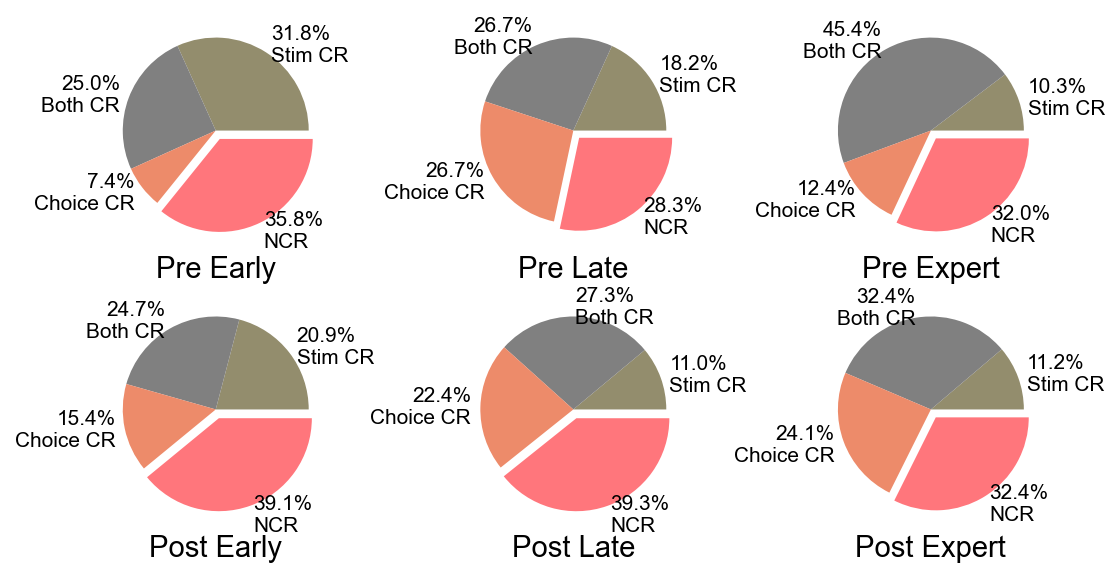

In [138]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],hspace=0.2)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)

################################################################################################################

size = 20
summary_size=100
summary_width=1#0.75

mn = 3.5
spread = 2.5
    
############

stim_CRNCR_threshold = 2.9034419036315477#3.5
choice_CRNCR_threshold = 0.8308610286728099

stim_CR_c = STIM_COLOR
choice_CR_c = CHOICE_COLOR

for ax,stim_mod,choice_mod in zip(axs,FRmod_data,ChoiceMod_data):
    stim_CR = np.greater_equal(stim_mod,stim_CRNCR_threshold)
    stim_NCR = np.less(stim_mod,stim_CRNCR_threshold)
    choice_CR = np.greater_equal(choice_mod,choice_CRNCR_threshold)
    choice_NCR = np.less(choice_mod,choice_CRNCR_threshold)
    
    Both_Sum = np.sum(np.logical_and(stim_CR,choice_CR))
    Stim_Sum = np.sum(np.logical_and(stim_CR,choice_NCR))
    Choice_Sum = np.sum(np.logical_and(stim_NCR,choice_CR))
    NCR_Sum = np.sum(np.logical_and(stim_NCR,choice_NCR))
    
    sums = np.array([Stim_Sum,Both_Sum,Choice_Sum,NCR_Sum])
    fracs = sums*100/np.sum(sums)
    labs = ['Stim CR','Both CR','Choice CR','NCR']
    ax.pie(fracs,colors=[stim_CR_c,CR_COLOR,choice_CR_c,NCR_COLOR],labels=[f"{np.around(fr,1)}%\n{l}" for fr,l in zip(fracs,labs)],explode=[0,0,0,0.1])

################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[idx])
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass

#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

# artists = [ylab,t1,t2]
#fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC FRmodulation all cells over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [228]:
CR_NCR_StimThresh = 3.5#2.9034419036315477
CR_NCR_ChoiceThresh = 0.8308610286728099#1.1059872908523893

pre_early_boot_NCR = []
pre_late_boot_NCR = []
pre_expert_boot_NCR = []
post_early_boot_NCR = []
post_late_boot_NCR = []
post_expert_boot_NCR = []

pre_early_boot_Stim = []
pre_late_boot_Stim = []
pre_expert_boot_Stim = []
post_early_boot_Stim = []
post_late_boot_Stim = []
post_expert_boot_Stim = []

pre_early_boot_Choice = []
pre_late_boot_Choice = []
pre_expert_boot_Choice = []
post_early_boot_Choice = []
post_late_boot_Choice = []
post_expert_boot_Choice = []

pre_early_boot_Both = []
pre_late_boot_Both = []
pre_expert_boot_Both = []
post_early_boot_Both = []
post_late_boot_Both = []
post_expert_boot_Both = []

assert len(FRmod_preearly) == len(ChoiceMod_preearly)
assert len(FRmod_prelate) == len(ChoiceMod_prelate)
assert len(FRmod_preexpert) == len(ChoiceMod_preexpert)
assert len(FRmod_postearly) == len(ChoiceMod_postearly)
assert len(FRmod_postlate) == len(ChoiceMod_postlate)
assert len(FRmod_postexpert) == len(ChoiceMod_postexpert)

for iteration in range(400):  #https://stats.stackexchange.com/questions/86040/rule-of-thumb-for-number-of-bootstrap-samples
    
    pre_early_sample = np.random.choice(range(len(FRmod_preearly)),size=len(FRmod_preearly))
    pre_early_sample_stim = FRmod_preearly[pre_early_sample]
    pre_early_sample_choice = ChoiceMod_preearly[pre_early_sample]
    pre_early_sample_stim,pre_early_sample_choice = ilep.paired_rmnan(pre_early_sample_stim,pre_early_sample_choice)
    CR_stim_mask = np.greater_equal(pre_early_sample_stim,CR_NCR_StimThresh)
    NCR_stim_mask = np.less(pre_early_sample_stim,CR_NCR_StimThresh)
    CR_choice_mask = np.greater_equal(pre_early_sample_choice,CR_NCR_ChoiceThresh)
    NCR_choice_mask = np.less(pre_early_sample_choice,CR_NCR_ChoiceThresh)
    pre_early_boot_Both.append(np.mean(np.logical_and(CR_stim_mask,CR_choice_mask)))
    pre_early_boot_Stim.append(np.mean(np.logical_and(CR_stim_mask,NCR_choice_mask)))
    pre_early_boot_Choice.append(np.mean(np.logical_and(NCR_stim_mask,CR_choice_mask)))
    pre_early_boot_NCR.append(np.mean(np.logical_and(NCR_stim_mask,NCR_choice_mask)))
    
    pre_late_sample = np.random.choice(range(len(FRmod_prelate)),size=len(FRmod_prelate))
    pre_late_sample_stim = FRmod_prelate[pre_late_sample]
    pre_late_sample_choice = ChoiceMod_prelate[pre_late_sample]
    pre_late_sample_stim,pre_late_sample_choice = ilep.paired_rmnan(pre_late_sample_stim,pre_late_sample_choice)
    CR_stim_mask = np.greater_equal(pre_late_sample_stim,CR_NCR_StimThresh)
    NCR_stim_mask = np.less(pre_late_sample_stim,CR_NCR_StimThresh)
    CR_choice_mask = np.greater_equal(pre_late_sample_choice,CR_NCR_ChoiceThresh)
    NCR_choice_mask = np.less(pre_late_sample_choice,CR_NCR_ChoiceThresh)
    pre_late_boot_Both.append(np.mean(np.logical_and(CR_stim_mask,CR_choice_mask)))
    pre_late_boot_Stim.append(np.mean(np.logical_and(CR_stim_mask,NCR_choice_mask)))
    pre_late_boot_Choice.append(np.mean(np.logical_and(NCR_stim_mask,CR_choice_mask)))
    pre_late_boot_NCR.append(np.mean(np.logical_and(NCR_stim_mask,NCR_choice_mask)))
    
    pre_expert_sample = np.random.choice(range(len(FRmod_preexpert)),size=len(FRmod_preexpert))
    pre_expert_sample_stim = FRmod_preexpert[pre_expert_sample]
    pre_expert_sample_choice = ChoiceMod_preexpert[pre_expert_sample]
    pre_expert_sample_stim,pre_expert_sample_choice = ilep.paired_rmnan(pre_expert_sample_stim,pre_expert_sample_choice)
    CR_stim_mask = np.greater_equal(pre_expert_sample_stim,CR_NCR_StimThresh)
    NCR_stim_mask = np.less(pre_expert_sample_stim,CR_NCR_StimThresh)
    CR_choice_mask = np.greater_equal(pre_expert_sample_choice,CR_NCR_ChoiceThresh)
    NCR_choice_mask = np.less(pre_expert_sample_choice,CR_NCR_ChoiceThresh)
    pre_expert_boot_Both.append(np.mean(np.logical_and(CR_stim_mask,CR_choice_mask)))
    pre_expert_boot_Stim.append(np.mean(np.logical_and(CR_stim_mask,NCR_choice_mask)))
    pre_expert_boot_Choice.append(np.mean(np.logical_and(NCR_stim_mask,CR_choice_mask)))
    pre_expert_boot_NCR.append(np.mean(np.logical_and(NCR_stim_mask,NCR_choice_mask)))
    
    
    
    post_early_sample = np.random.choice(range(len(FRmod_postearly)),size=len(FRmod_postearly))
    post_early_sample_stim = FRmod_postearly[post_early_sample]
    post_early_sample_choice = ChoiceMod_postearly[post_early_sample]
    post_early_sample_stim,post_early_sample_choice = ilep.paired_rmnan(post_early_sample_stim,post_early_sample_choice)
    CR_stim_mask = np.greater_equal(post_early_sample_stim,CR_NCR_StimThresh)
    NCR_stim_mask = np.less(post_early_sample_stim,CR_NCR_StimThresh)
    CR_choice_mask = np.greater_equal(post_early_sample_choice,CR_NCR_ChoiceThresh)
    NCR_choice_mask = np.less(post_early_sample_choice,CR_NCR_ChoiceThresh)
    post_early_boot_Both.append(np.mean(np.logical_and(CR_stim_mask,CR_choice_mask)))
    post_early_boot_Stim.append(np.mean(np.logical_and(CR_stim_mask,NCR_choice_mask)))
    post_early_boot_Choice.append(np.mean(np.logical_and(NCR_stim_mask,CR_choice_mask)))
    post_early_boot_NCR.append(np.mean(np.logical_and(NCR_stim_mask,NCR_choice_mask)))
    
    post_late_sample = np.random.choice(range(len(FRmod_postlate)),size=len(FRmod_postlate))
    post_late_sample_stim = FRmod_postlate[post_late_sample]
    post_late_sample_choice = ChoiceMod_postlate[post_late_sample]
    post_late_sample_stim,post_late_sample_choice = ilep.paired_rmnan(post_late_sample_stim,post_late_sample_choice)
    CR_stim_mask = np.greater_equal(post_late_sample_stim,CR_NCR_StimThresh)
    NCR_stim_mask = np.less(post_late_sample_stim,CR_NCR_StimThresh)
    CR_choice_mask = np.greater_equal(post_late_sample_choice,CR_NCR_ChoiceThresh)
    NCR_choice_mask = np.less(post_late_sample_choice,CR_NCR_ChoiceThresh)
    post_late_boot_Both.append(np.mean(np.logical_and(CR_stim_mask,CR_choice_mask)))
    post_late_boot_Stim.append(np.mean(np.logical_and(CR_stim_mask,NCR_choice_mask)))
    post_late_boot_Choice.append(np.mean(np.logical_and(NCR_stim_mask,CR_choice_mask)))
    post_late_boot_NCR.append(np.mean(np.logical_and(NCR_stim_mask,NCR_choice_mask)))
    
    post_expert_sample = np.random.choice(range(len(FRmod_postexpert)),size=len(FRmod_postexpert))
    post_expert_sample_stim = FRmod_postexpert[post_expert_sample]
    post_expert_sample_choice = ChoiceMod_postexpert[post_expert_sample]
    post_expert_sample_stim,post_expert_sample_choice = ilep.paired_rmnan(post_expert_sample_stim,post_expert_sample_choice)
    CR_stim_mask = np.greater_equal(post_expert_sample_stim,CR_NCR_StimThresh)
    NCR_stim_mask = np.less(post_expert_sample_stim,CR_NCR_StimThresh)
    CR_choice_mask = np.greater_equal(post_expert_sample_choice,CR_NCR_ChoiceThresh)
    NCR_choice_mask = np.less(post_expert_sample_choice,CR_NCR_ChoiceThresh)
    post_expert_boot_Both.append(np.mean(np.logical_and(CR_stim_mask,CR_choice_mask)))
    post_expert_boot_Stim.append(np.mean(np.logical_and(CR_stim_mask,NCR_choice_mask)))
    post_expert_boot_Choice.append(np.mean(np.logical_and(NCR_stim_mask,CR_choice_mask)))
    post_expert_boot_NCR.append(np.mean(np.logical_and(NCR_stim_mask,NCR_choice_mask)))

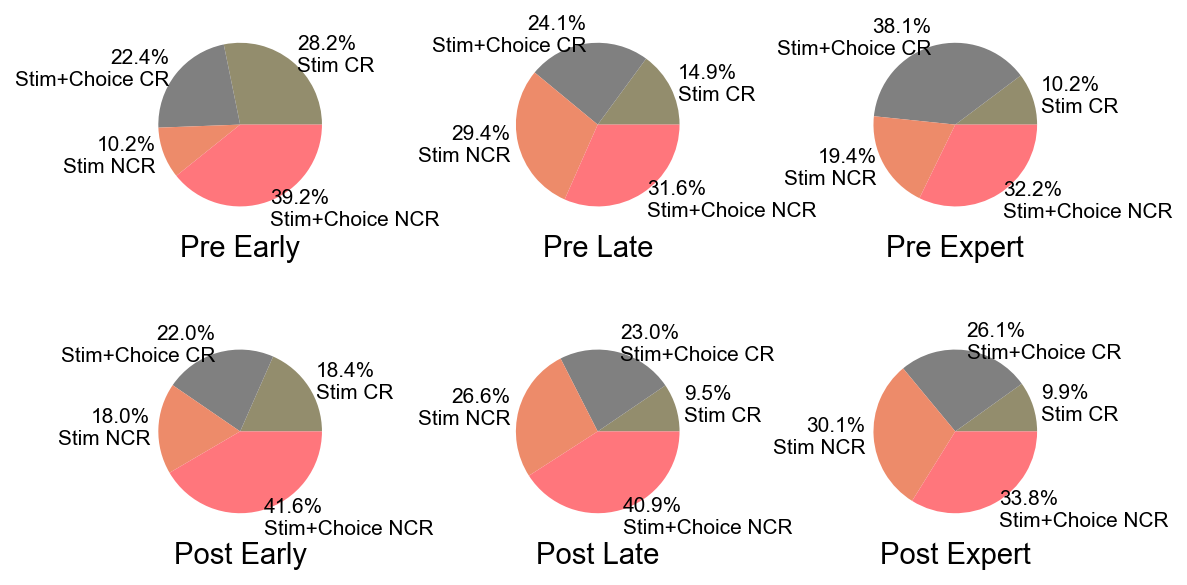

In [172]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],hspace=0.5)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)

################################################################################################################

size = 20
summary_size=100
summary_width=1#0.75

mn = 3.5
spread = 2.5

pct_Both = [pre_early_boot_Both,pre_late_boot_Both,pre_expert_boot_Both,post_early_boot_Both,post_late_boot_Both,post_expert_boot_Both]
pct_Stim = [pre_early_boot_Stim,pre_late_boot_Stim,pre_expert_boot_Stim,post_early_boot_Stim,post_late_boot_Stim,post_expert_boot_Stim]
pct_Choice = [pre_early_boot_Choice,pre_late_boot_Choice,pre_expert_boot_Choice,post_early_boot_Choice,post_late_boot_Choice,post_expert_boot_Choice]
pct_NCR = [pre_early_boot_NCR,pre_late_boot_NCR,pre_expert_boot_NCR,post_early_boot_NCR,post_late_boot_NCR,post_expert_boot_NCR]
    
############

pies = []
for ax,both,stim,choice,ncr in zip(axs,pct_Both,pct_Stim,pct_Choice,pct_NCR):
    both_CR = np.mean(both)*100
    stim_CR = np.mean(stim)*100
    choice_CR = np.mean(choice)*100
    NCR = np.mean(ncr)*100
    
    fracs = np.array([stim_CR,both_CR,choice_CR,NCR])
    labs = ['Stim CR','Stim+Choice CR','Stim NCR','Stim+Choice NCR']
    pies.append(ax.pie(fracs,colors=[STIM_COLOR,CR_COLOR,CHOICE_COLOR,NCR_COLOR],labels=[f"{np.around(fr,1)}%\n{l}" for fr,l in zip(fracs,labs)],explode=[0,0,0,0]))

################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[idx])
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass

#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [t for t in np.concatenate([p[1] for p in pies])]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC population statistics over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

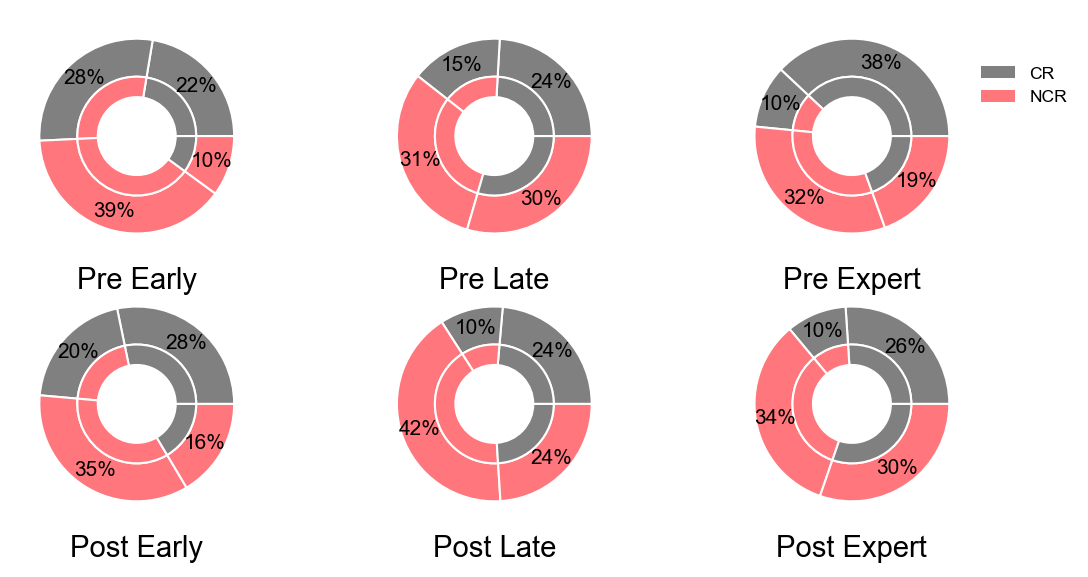

In [313]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],hspace=0.1)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)
size = 0.6
stim_bias_frac = 0.65

################################################################################################################

pct_Both = [pre_early_boot_Both,pre_late_boot_Both,pre_expert_boot_Both,post_early_boot_Both,post_late_boot_Both,post_expert_boot_Both]
pct_Stim = [pre_early_boot_Stim,pre_late_boot_Stim,pre_expert_boot_Stim,post_early_boot_Stim,post_late_boot_Stim,post_expert_boot_Stim]
pct_Choice = [pre_early_boot_Choice,pre_late_boot_Choice,pre_expert_boot_Choice,post_early_boot_Choice,post_late_boot_Choice,post_expert_boot_Choice]
pct_NCR = [pre_early_boot_NCR,pre_late_boot_NCR,pre_expert_boot_NCR,post_early_boot_NCR,post_late_boot_NCR,post_expert_boot_NCR]
    
############

pies = []
for ax,both,stim,choice,ncr in zip(axs,pct_Both,pct_Stim,pct_Choice,pct_NCR):
    both_CR = np.mean(both)*100
    stim_CR = np.mean(stim)*100
    choice_CR = np.mean(choice)*100
    NCR = np.mean(ncr)*100
    
    vals = np.array([[both_CR, stim_CR], [NCR, choice_CR]])
    outer_colors = [CR_COLOR,NCR_COLOR]
    inner_colors = [CR_COLOR,NCR_COLOR,NCR_COLOR,CR_COLOR]

    outer = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
           wedgeprops=dict(width=size*stim_bias_frac, edgecolor='w'),autopct='%1.0f%%',pctdistance=1-0.5*size*stim_bias_frac)
    pies.append(outer)
    
    inner = ax.pie(vals.flatten(), radius=1-size*stim_bias_frac, colors=inner_colors,
           wedgeprops=dict(width=size*(1-stim_bias_frac), edgecolor='w'),autopct='%1.0f%%',pctdistance=1-0.5*size*(1-stim_bias_frac),textprops={'fontsize': 8})
    pies.append(inner)
    
################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[idx])
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass

axs[2].fill_between([],[],fc=CR_COLOR,label='CR')
axs[2].fill_between([],[],fc=NCR_COLOR,label='NCR')
lgd = axs[2].legend(frameon=False,loc=(1,0.6))
    
#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [t for t in np.concatenate([p[1] for p in pies])]
artists.append(lgd)
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC population statistics over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

## V2

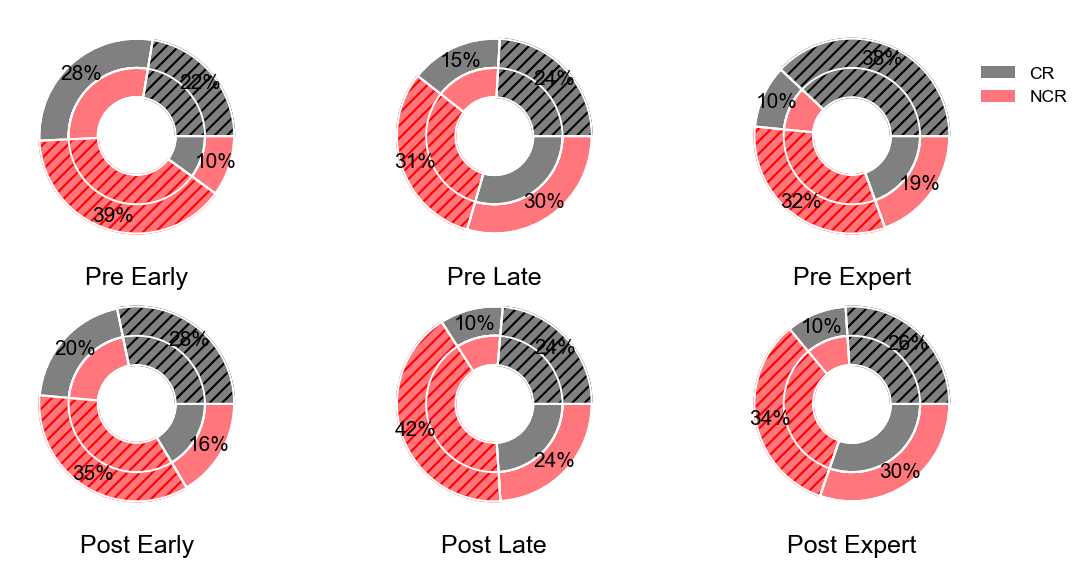

In [381]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],hspace=0.1)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)
size = 0.6
stim_bias_frac = 0.5

################################################################################################################

pct_Both = [pre_early_boot_Both,pre_late_boot_Both,pre_expert_boot_Both,post_early_boot_Both,post_late_boot_Both,post_expert_boot_Both]
pct_Stim = [pre_early_boot_Stim,pre_late_boot_Stim,pre_expert_boot_Stim,post_early_boot_Stim,post_late_boot_Stim,post_expert_boot_Stim]
pct_Choice = [pre_early_boot_Choice,pre_late_boot_Choice,pre_expert_boot_Choice,post_early_boot_Choice,post_late_boot_Choice,post_expert_boot_Choice]
pct_NCR = [pre_early_boot_NCR,pre_late_boot_NCR,pre_expert_boot_NCR,post_early_boot_NCR,post_late_boot_NCR,post_expert_boot_NCR]
    
############

pies = []
for ax,both,stim,choice,ncr in zip(axs,pct_Both,pct_Stim,pct_Choice,pct_NCR):
    both_CR = np.mean(both)*100
    stim_CR = np.mean(stim)*100
    choice_CR = np.mean(choice)*100
    NCR = np.mean(ncr)*100
    
    vals = np.array([[both_CR, stim_CR], [NCR, choice_CR]])
#     outer_colors = [CR_COLOR,NCR_COLOR]
    outer_colors = [CR_COLOR,CR_COLOR,NCR_COLOR,NCR_COLOR]
    inner_colors = [CR_COLOR,NCR_COLOR,NCR_COLOR,CR_COLOR]

#     outer = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
#            wedgeprops=dict(width=size*stim_bias_frac, edgecolor='w'),autopct='%1.0f%%',pctdistance=1-0.5*size*stim_bias_frac)
#     pies.append(outer)
    outer = ax.pie(vals.flatten(), radius=1, colors=outer_colors,
           wedgeprops=dict(width=size*stim_bias_frac, edgecolor='w'),autopct='%1.0f%%',pctdistance=1-0.5*size*stim_bias_frac)
    outer[0][0].set_edgecolor('k')
    outer[0][0].set_hatch('////')
    outer[0][2].set_edgecolor('r')
    outer[0][2].set_hatch('////')
    outer2 = ax.pie(vals.flatten(), radius=1, colors=['none']*4,
           wedgeprops=dict(width=size*stim_bias_frac, edgecolor='w'))
    pies.append(outer)
    
#     inner = ax.pie(vals.flatten(), radius=1-size*stim_bias_frac, colors=inner_colors,
#            wedgeprops=dict(width=size*(1-stim_bias_frac), edgecolor='w'),autopct='%1.0f%%',pctdistance=1-0.5*size*(1-stim_bias_frac),textprops={'fontsize': 8})
#     pies.append(inner)
    inner = ax.pie(vals.flatten(), radius=1-size*stim_bias_frac, colors=inner_colors,
           wedgeprops=dict(width=size*(1-stim_bias_frac), edgecolor='w'))
    inner[0][0].set_edgecolor('k')
    inner[0][0].set_hatch('////')
    inner[0][2].set_edgecolor('r')
    inner[0][2].set_hatch('////')
    inner2 = ax.pie(vals.flatten(), radius=1-size*stim_bias_frac, colors=['none']*4,
           wedgeprops=dict(width=size*(1-stim_bias_frac), edgecolor='w'))
    pies.append(inner)
    
################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[idx])
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass

axs[2].fill_between([],[],fc=CR_COLOR,label='CR')
axs[2].fill_between([],[],fc=NCR_COLOR,label='NCR')
lgd = axs[2].legend(frameon=False,loc=(1,0.6))
    
#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [t for t in np.concatenate([p[1] for p in pies])]
artists.append(lgd)
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC population statistics over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=1600, bbox_extra_artists=(artists), bbox_inches='tight')

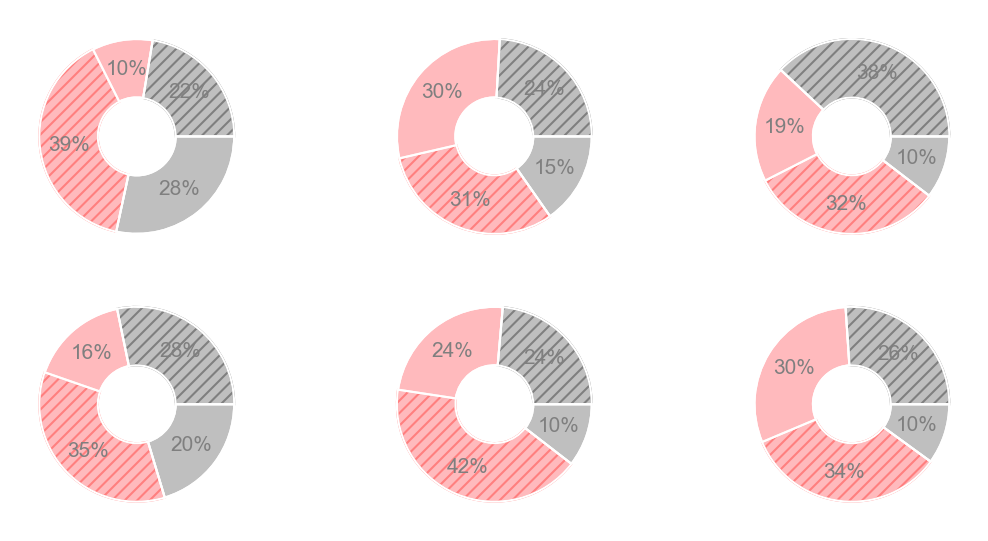

In [445]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],hspace=0.1)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)
size = 0.6
stim_bias_frac = 1

################################################################################################################

pct_Both = [pre_early_boot_Both,pre_late_boot_Both,pre_expert_boot_Both,post_early_boot_Both,post_late_boot_Both,post_expert_boot_Both]
pct_Stim = [pre_early_boot_Stim,pre_late_boot_Stim,pre_expert_boot_Stim,post_early_boot_Stim,post_late_boot_Stim,post_expert_boot_Stim]
pct_Choice = [pre_early_boot_Choice,pre_late_boot_Choice,pre_expert_boot_Choice,post_early_boot_Choice,post_late_boot_Choice,post_expert_boot_Choice]
pct_NCR = [pre_early_boot_NCR,pre_late_boot_NCR,pre_expert_boot_NCR,post_early_boot_NCR,post_late_boot_NCR,post_expert_boot_NCR]
    
############

pies = []
for ax,both,stim,choice,ncr in zip(axs,pct_Both,pct_Stim,pct_Choice,pct_NCR):
    both_CR = np.mean(both)*100
    stim_CR = np.mean(stim)*100
    choice_CR = np.mean(choice)*100
    NCR = np.mean(ncr)*100
    
    vals = np.array([[both_CR, choice_CR], [NCR, stim_CR]])
#     outer_colors = [CR_COLOR,NCR_COLOR]
    outer_colors = [CR_COLOR,NCR_COLOR,NCR_COLOR,CR_COLOR]
    inner_colors = [CR_COLOR,CR_COLOR,NCR_COLOR,NCR_COLOR]

#     outer = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
#            wedgeprops=dict(width=size*stim_bias_frac, edgecolor='w'),autopct='%1.0f%%',pctdistance=1-0.5*size*stim_bias_frac)
#     pies.append(outer)
    outer = ax.pie(vals.flatten(), radius=1, colors=outer_colors,
           wedgeprops=dict(width=size*stim_bias_frac, edgecolor='w'),autopct='%1.0f%%',pctdistance=1-0.5*size*stim_bias_frac)
    outer[0][0].set_edgecolor('k')
    outer[0][0].set_hatch('////')
    outer[0][2].set_edgecolor('r')
    outer[0][2].set_hatch('////')
    outer2 = ax.pie(vals.flatten(), radius=1, colors=['none']*4,
           wedgeprops=dict(width=size*stim_bias_frac, edgecolor='w'))
    pies.append(outer)
    
################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.set_xlabel(labels[idx])
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    xlim,ylim = ax.get_xlim(),ax.get_ylim()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.fill_between(xlim,[ylim[0]]*2,[ylim[1]]*2,fc='white',lw=0,alpha=0.5,zorder=10)

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass

# axs[2].fill_between([],[],fc=CR_COLOR,label='CR')
# axs[2].fill_between([],[],fc=NCR_COLOR,label='NCR')
# lgd = axs[2].legend(frameon=False,loc=(1,0.6))
    
#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [t for t in np.concatenate([p[1] for p in pies])]
# artists.append(lgd)
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC population statistics over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=1600, bbox_extra_artists=(artists), bbox_inches='tight')

In [80]:
data_dec = SimpleNamespace()
data_dec.preearly = [np.mean(p) for p in pre_early_boot_NCR]
data_dec.prelate = [np.mean(p) for p in pre_late_boot_NCR]
data_dec.preexpert = [np.mean(p) for p in pre_expert_boot_NCR]
data_dec.postearly = [np.mean(p) for p in post_early_boot_NCR]
data_dec.postlate = [np.mean(p) for p in post_late_boot_NCR]
data_dec.postexpert = [np.mean(p) for p in post_expert_boot_NCR]
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
pass

            Source        SS    DF        MS            F          p-unc  \
0            phase  7.322468     3  2.440823  2279.173111   0.000000e+00   
1          context  3.803295     1  3.803295  3551.412630   0.000000e+00   
2  phase * context  0.972765     3  0.324255   302.780284  5.635976e-173   
3         Residual  3.418392  3192  0.001071          NaN            NaN   

        np2  
0  0.681739  
1  0.526649  
2  0.221528  
3       NaN  

          phase         A             B          p-unc         p-corr  \
7   post-expert  baseline  experimental  6.315650e-132  2.526260e-131   
8     post-late  baseline  experimental   2.742266e-27   2.742266e-27   
9    pre-expert  baseline  experimental   7.694166e-69   1.025889e-68   
10     pre-late  baseline  experimental   1.446546e-96   2.893092e-96   

      hedges  
7   4.279496  
8   0.846036  
9   1.541869  
10  2.048896  


In [65]:
data_dec = SimpleNamespace()
data_dec.preearly = [np.mean(p) for p in pre_early_boot_Both]
data_dec.prelate = [np.mean(p) for p in pre_late_boot_Both]
data_dec.preexpert = [np.mean(p) for p in pre_expert_boot_Both]
data_dec.postearly = [np.mean(p) for p in post_early_boot_Both]
data_dec.postlate = [np.mean(p) for p in post_late_boot_Both]
data_dec.postexpert = [np.mean(p) for p in post_expert_boot_Both]
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
pass

            Source        SS    DF        MS           F          p-unc  \
0            phase  1.443912     3  0.481304  559.158772  4.848376e-292   
1          context  0.356365     1  0.356365  414.010101   1.225200e-86   
2  phase * context  0.568176     3  0.189392  220.027619  9.679037e-130   
3         Residual  2.747561  3192  0.000861         NaN            NaN   

        np2  
0  0.344488  
1  0.114811  
2  0.171357  
3       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  5.304891e-03  7.073188e-03 -0.195541
8     post-late  baseline  experimental  3.827705e-16  7.655409e-16 -0.614866
9    pre-expert  baseline  experimental  2.051562e-82  8.206247e-82 -1.759738
10     pre-late  baseline  experimental  6.610813e-01  6.610813e-01 -0.036192


In [66]:
data_dec = SimpleNamespace()
data_dec.preearly = [np.mean(p) for p in pre_early_boot_Stim]
data_dec.prelate = [np.mean(p) for p in pre_late_boot_Stim]
data_dec.preexpert = [np.mean(p) for p in pre_expert_boot_Stim]
data_dec.postearly = [np.mean(p) for p in post_early_boot_Stim]
data_dec.postlate = [np.mean(p) for p in post_late_boot_Stim]
data_dec.postexpert = [np.mean(p) for p in post_expert_boot_Stim]
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
pass

            Source        SS    DF        MS            F  p-unc       np2
0            phase  7.102656     3  2.367552  4456.311588    0.0  0.807257
1          context  3.984688     1  3.984688  7500.156662    0.0  0.701463
2  phase * context  1.414544     3  0.471515   887.506183    0.0  0.454780
3         Residual  1.695848  3192  0.000531          NaN    NaN       NaN

          phase         A             B          p-unc         p-corr  \
7   post-expert  baseline  experimental   1.367617e-33   1.367617e-33   
8     post-late  baseline  experimental  5.162004e-132  1.898117e-131   
9    pre-expert  baseline  experimental  2.454553e-106  3.272737e-106   
10     pre-late  baseline  experimental  9.490584e-132  1.898117e-131   

      hedges  
7   0.923488  
8   5.062364  
9   2.294426  
10  4.172286  


In [68]:
data_dec = SimpleNamespace()
data_dec.preearly = [np.mean(p) for p in pre_early_boot_Choice]
data_dec.prelate = [np.mean(p) for p in pre_late_boot_Choice]
data_dec.preexpert = [np.mean(p) for p in pre_expert_boot_Choice]
data_dec.postearly = [np.mean(p) for p in post_early_boot_Choice]
data_dec.postlate = [np.mean(p) for p in post_late_boot_Choice]
data_dec.postexpert = [np.mean(p) for p in post_expert_boot_Choice]
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
pass

            Source         SS    DF        MS            F          p-unc  \
0            phase   2.151151     3  0.717050   889.049603   0.000000e+00   
1          context   1.177908     1  1.177908  1460.453559  1.840727e-263   
2  phase * context  11.307586     3  3.769195  4673.313943   0.000000e+00   
3         Residual   2.574463  3192  0.000807          NaN            NaN   

        np2  
0  0.455211  
1  0.313910  
2  0.814547  
3       NaN  

          phase         A             B          p-unc         p-corr  \
7   post-expert  baseline  experimental   2.476176e-25   2.476176e-25   
8     post-late  baseline  experimental  7.308468e-131  1.461694e-130   
9    pre-expert  baseline  experimental  1.265093e-126  1.686790e-126   
10     pre-late  baseline  experimental  1.647369e-132  6.589477e-132   

      hedges  
7   0.786041  
8  -4.165089  
9   3.278771  
10 -6.734240  


# Scatterplot (Bannerjee et al. 2020 Fig3c style)

In [ ]:
# FRmod_preearly = []
# FRmod_prelate = []
# FRmod_preexpert = []
# FRmod_postearly = []
# FRmod_postlate = []
# FRmod_postexpert = []

# ChoiceMod_preearly = []
# ChoiceMod_prelate = []
# ChoiceMod_preexpert = []
# ChoiceMod_postearly = []
# ChoiceMod_postlate = []
# ChoiceMod_postexpert = []

for p

<ipython-input-446-48a99d0013db>:60: RuntimeWarning: divide by zero encountered in log10
  logChoiceMod = ilep.rmnan(np.log10(ChoiceMod_phase))
<ipython-input-446-48a99d0013db>:43: RuntimeWarning: divide by zero encountered in log10
  logStimMod = ilep.rmnan(np.log10(FRmod_phase))


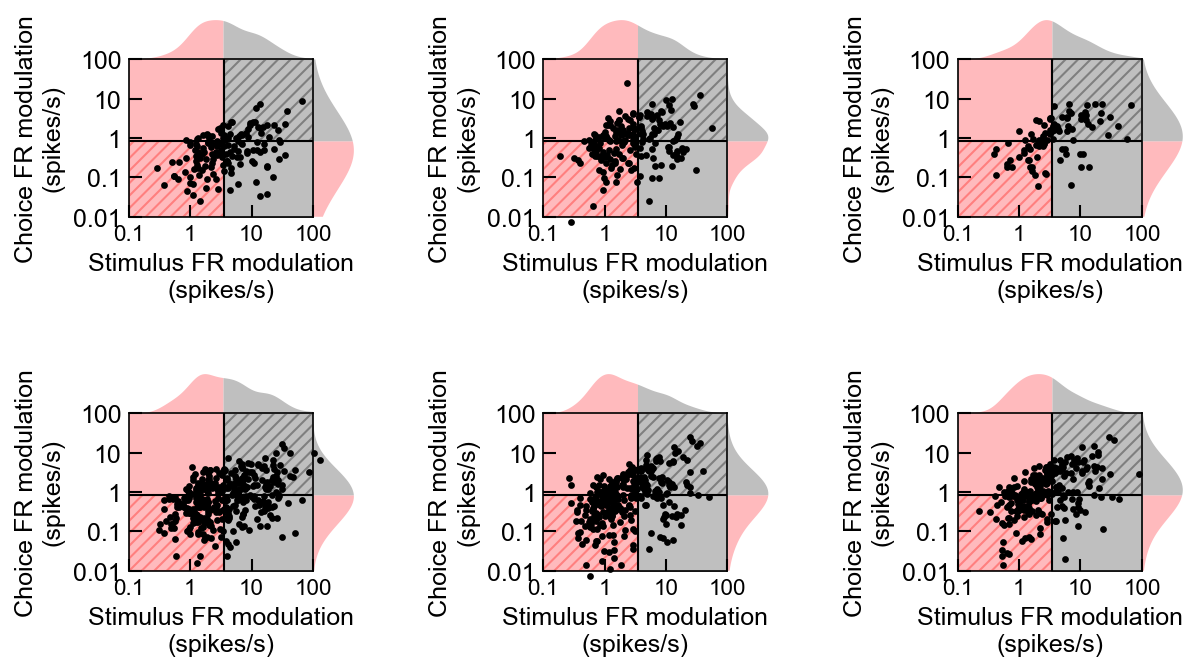

In [446]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],wspace=1.25,hspace=1.25)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)
size = 0.6
stim_bias_frac = 0.5

stdfont=12
################################################################################################################

FRmod_data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
ChoiceMod_data = [ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert]

for idx,(ax,FRmod_phase,ChoiceMod_phase) in enumerate(zip(axs,FRmod_data,ChoiceMod_data)):
    
    ax.scatter(FRmod_phase,ChoiceMod_phase,s=5,clip_on=False,c='k')
    ax.axvline(CR_NCR_StimThresh,color='k',lw=1,zorder=-5)
    ax.axhline(CR_NCR_ChoiceThresh,color='k',lw=1,zorder=-5)
    
    logStimMod = ilep.rmnan(np.log10(FRmod_phase))
    KDE_stim = gaussian_kde(logStimMod,bw_method='scott')
    xrange_NCR = np.linspace(-1,np.log10(CR_NCR_StimThresh),1000)
    xrange_CR = np.linspace(np.log10(CR_NCR_StimThresh),2,1000)
    KDE_stim_NCR_eval = KDE_stim.evaluate(xrange_NCR)
    KDE_stim_CR_eval = KDE_stim.evaluate(xrange_CR)
    max_NCR = np.max(KDE_stim_NCR_eval)
    max_CR = np.max(KDE_stim_CR_eval)
    max_prob = max(max_NCR,max_CR)
    KDE_stim_NCR_eval /= max_prob
    KDE_stim_CR_eval /= max_prob
    KDE_stim_NCR_eval = 100*(10**KDE_stim_NCR_eval)
    KDE_stim_CR_eval = 100*(10**KDE_stim_CR_eval)
    ax.fill_between(10**xrange_NCR,[100]*1000,KDE_stim_NCR_eval,lw=0,fc=NCR_COLOR,clip_on=False,zorder=-10)
    ax.fill_between(10**xrange_CR,[100]*1000,KDE_stim_CR_eval,lw=0,fc=CR_COLOR,clip_on=False,zorder=-10)
    
    
    logChoiceMod = ilep.rmnan(np.log10(ChoiceMod_phase))
    KDE_stim = gaussian_kde(logChoiceMod,bw_method='scott')
    yrange_NCR = np.linspace(-2,np.log10(CR_NCR_ChoiceThresh),1000)
    yrange_CR = np.linspace(np.log10(CR_NCR_ChoiceThresh),2,1000)
    KDE_choice_NCR_eval = KDE_stim.evaluate(yrange_NCR)
    KDE_choice_CR_eval = KDE_stim.evaluate(yrange_CR)
    max_NCR = np.max(KDE_choice_NCR_eval)
    max_CR = np.max(KDE_choice_CR_eval)
    max_prob = max(max_NCR,max_CR) * 1.5
    KDE_choice_NCR_eval /= max_prob
    KDE_choice_CR_eval /= max_prob
    KDE_choice_NCR_eval = 100*(10**KDE_choice_NCR_eval)
    KDE_choice_CR_eval = 100*(10**KDE_choice_CR_eval)
    ax.fill_betweenx(10**yrange_NCR,[100]*1000,KDE_choice_NCR_eval,lw=0,fc=NCR_COLOR,clip_on=False,zorder=-10)
    ax.fill_betweenx(10**yrange_CR,[100]*1000,KDE_choice_CR_eval,lw=0,fc=CR_COLOR,clip_on=False,zorder=-10)
    
################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.set_xticks([])
#     ax.set_yticks([])
    ax.set_xscale('log',subs=[])
    ax.set_yscale('log',subs=[])
    ax.set_xlim([0.1,100])
    ax.set_ylim([0.01,100])
    ax.set_xticks([0.1,1,10,100])
    ax.set_xticklabels([str(s) for s in [0.1,1,10,100]])
    ax.set_yticks([0.01,0.1,1,10,100])
    ax.set_yticklabels([str(s) for s in [0.01,0.1,1,10,100]])
    ax.set_xlabel(f'Stimulus FR modulation\n(spikes/s)')
    ax.set_ylabel(f'Choice FR modulation\n(spikes/s)')
#     ax.set_title(labels[idx])
    
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.fill_between([xlim[0],CR_NCR_StimThresh],[ylim[0]]*2,[CR_NCR_ChoiceThresh]*2,zorder=-10,color=NCR_COLOR,hatch='////',ec='red')
    ax.fill_between([xlim[0],CR_NCR_StimThresh],[CR_NCR_ChoiceThresh]*2,[ylim[1]]*2,zorder=-10,color=NCR_COLOR,ec=NCR_COLOR)
    ax.fill_between([CR_NCR_StimThresh,xlim[1]],[ylim[0]]*2,[CR_NCR_ChoiceThresh]*2,zorder=-10,color=CR_COLOR,ec=CR_COLOR)
    ax.fill_between([CR_NCR_StimThresh,xlim[1]],[CR_NCR_ChoiceThresh]*2,[ylim[1]]*2,zorder=-10,color=CR_COLOR,hatch='////',ec='k')
    ax.fill_between([CR_NCR_StimThresh,xlim[1]],[CR_NCR_ChoiceThresh]*2,[ylim[1]]*2,zorder=-10,fc='none',ec=CR_COLOR)
    ax.fill_between([xlim[0],xlim[1]*10],[ylim[0]]*2,[ylim[1]*10]*2,fc='white',alpha=0.5,zorder=-9,lw=10,clip_on=False)
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass

# axs[2].fill_between([],[],fc=CR_COLOR,label='CR')
# axs[2].fill_between([],[],fc=NCR_COLOR,label='NCR')
# lgd = axs[2].legend(frameon=False,loc=(1,0.6))
    
#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [t for t in np.concatenate([p[1] for p in pies])]
# artists.append(lgd)
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC population statistics scatter over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=1600, bbox_extra_artists=(artists), bbox_inches='tight')

# Evoked / Suppressed

In [89]:
print(FR_CR_evoked)
print(FR_CR_suppressed)
print(FR_CR_choice_evoked)
print(FR_CR_choice_suppressed)
print(FR_NCR)
print(FR_NCR_choice)

[67, 60, 36, 156, 93, 85]
[8, 13, 11, 14, 9, 12]
[27, 61, 40, 110, 108, 91]
[21, 39, 16, 46, 35, 45]
[73, 115, 70, 179, 197, 186]
[100, 88, 61, 193, 156, 147]


In [90]:
FR_CR_evoked = np.array(FR_CR_evoked)
FR_CR_suppressed = np.array(FR_CR_suppressed)
FR_CR_choice_evoked = np.array(FR_CR_choice_evoked)
FR_CR_choice_suppressed = np.array(FR_CR_choice_suppressed)
FR_NCR = np.array(FR_NCR)
FR_NCR_choice = np.array(FR_NCR_choice)

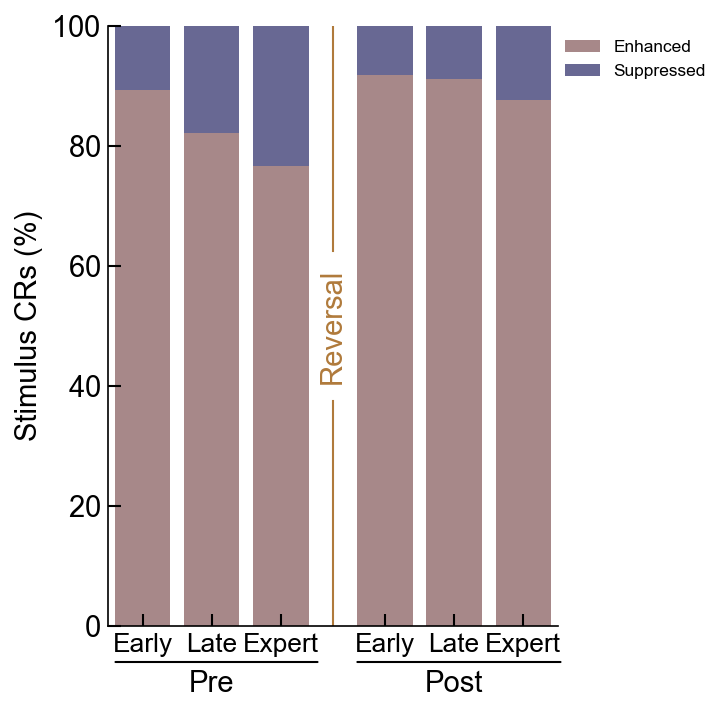

In [50]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

evoked_pc = 100 * FR_CR_evoked / (FR_CR_evoked+FR_CR_suppressed)
suppressed_pc = 100 * FR_CR_evoked / (FR_CR_evoked+FR_CR_suppressed)

ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], evoked_pc, color = '#A78889',label='Enhanced')
ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], bottom=evoked_pc,height=suppressed_pc, color = '#686893',label='Suppressed')

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ylab = ax.set_ylabel('Stimulus CRs (%)')
ax.set_ylim([0,100])
ax.set_yticks([0,20,40,60,80,100])
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.0075, -stdyfrac), xycoords='axes fraction', xytext=(0.475, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.545, -stdyfrac), xycoords='axes fraction', xytext=(1.015, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

lgd = ax.legend(frameon=False,loc=(1,0.9))

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2,lgd]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent evoked stimulus V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

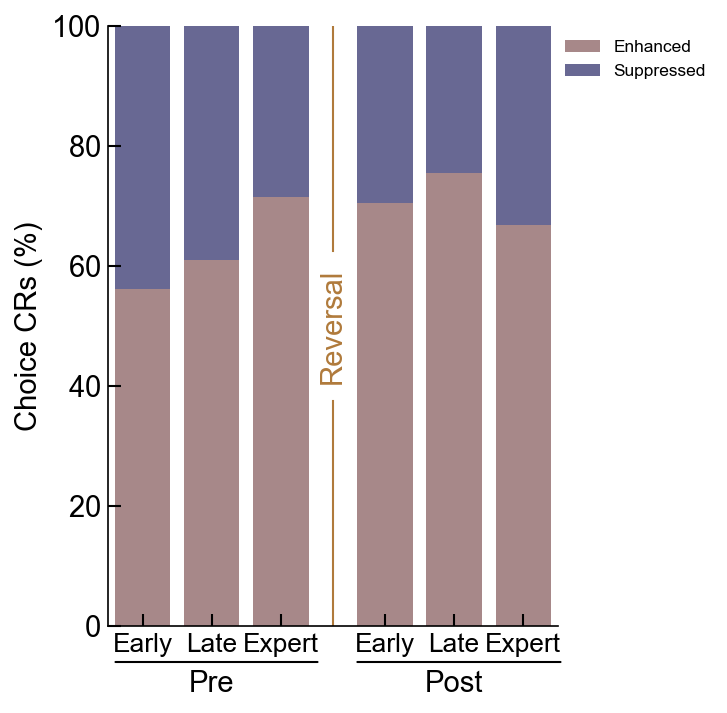

In [51]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

evoked_pc = 100 * FR_CR_choice_evoked / (FR_CR_choice_evoked+FR_CR_choice_suppressed)
suppressed_pc = 100 * FR_CR_choice_evoked / (FR_CR_choice_evoked+FR_CR_choice_suppressed)

ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], evoked_pc, color = '#A78889',label='Enhanced')
ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], bottom=evoked_pc,height=suppressed_pc, color = '#686893',label='Suppressed')

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ylab = ax.set_ylabel('Choice CRs (%)')
ax.set_ylim([0,100])
ax.set_yticks([0,20,40,60,80,100])
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.0075, -stdyfrac), xycoords='axes fraction', xytext=(0.475, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.545, -stdyfrac), xycoords='axes fraction', xytext=(1.015, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

lgd = ax.legend(frameon=False,loc=(1,0.9))

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2,lgd]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent evoked choice V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

# V2

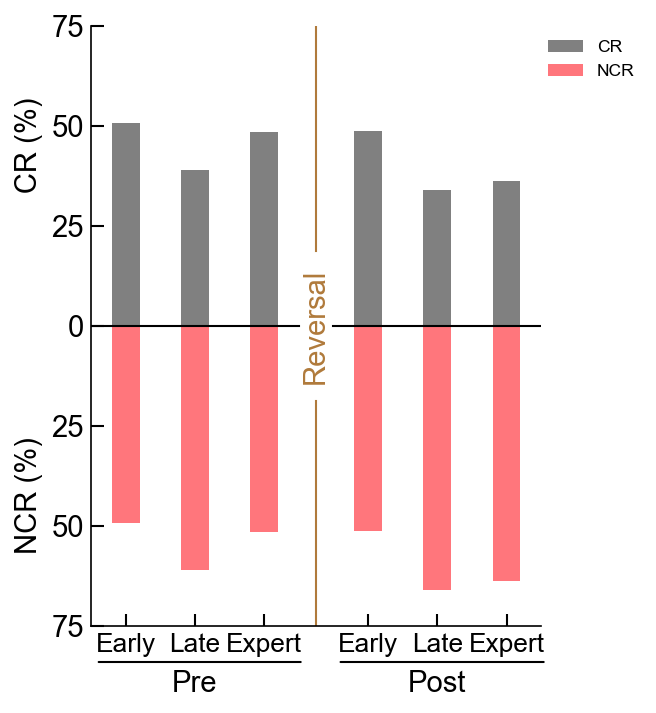

In [59]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
CR_pc = [100 * np.mean(np.greater_equal(ilep.rmnan(d),3.5)) for d in data]
NCR_pc = [-100 * np.mean(np.less(ilep.rmnan(d),3.5)) for d in data]

ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], CR_pc, width=0.4, color = CR_COLOR,label='CR')
ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], NCR_pc, width=0.4, color = NCR_COLOR,label='NCR')

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ax.set_ylim([-75,75])
ax.set_yticks([-75,-50,-25,0,25,50,75])
ax.set_yticklabels([75,50,25,0,25,50,75])
ylab = ax.set_ylabel('NCR (%)                              CR (%)')

ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

ax.plot([ax.get_xlim()[0],2.5-switch_offset],[0,0],c='k',lw=1)
ax.plot([2.5+switch_offset,ax.get_xlim()[1]],[0,0],c='k',lw=1)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.0075, -stdyfrac), xycoords='axes fraction', xytext=(0.475, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.545, -stdyfrac), xycoords='axes fraction', xytext=(1.015, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

lgd = ax.legend(frameon=False,loc=(1,0.9))

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2,lgd]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent CRNCR stimulus V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

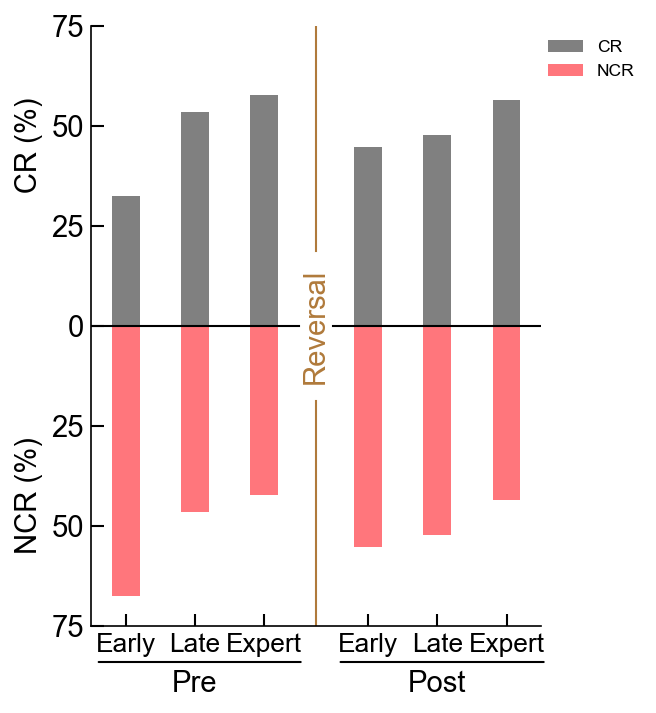

In [83]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

data = [ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert]
CR_pc = [100 * np.mean(np.greater_equal(ilep.rmnan(d),0.8308610286728099)) for d in data]
NCR_pc = [-100 * np.mean(np.less(ilep.rmnan(d),0.8308610286728099)) for d in data]

ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], CR_pc, width=0.4, color = CR_COLOR,label='CR')
ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], NCR_pc, width=0.4, color = NCR_COLOR,label='NCR')

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ax.set_ylim([-75,75])
ax.set_yticks([-75,-50,-25,0,25,50,75])
ax.set_yticklabels([75,50,25,0,25,50,75])
ylab = ax.set_ylabel('NCR (%)                              CR (%)')

ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

ax.plot([ax.get_xlim()[0],2.5-switch_offset],[0,0],c='k',lw=1)
ax.plot([2.5+switch_offset,ax.get_xlim()[1]],[0,0],c='k',lw=1)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.0075, -stdyfrac), xycoords='axes fraction', xytext=(0.475, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.545, -stdyfrac), xycoords='axes fraction', xytext=(1.015, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

lgd = ax.legend(frameon=False,loc=(1,0.9))

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2,lgd]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent CRNCR choice V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

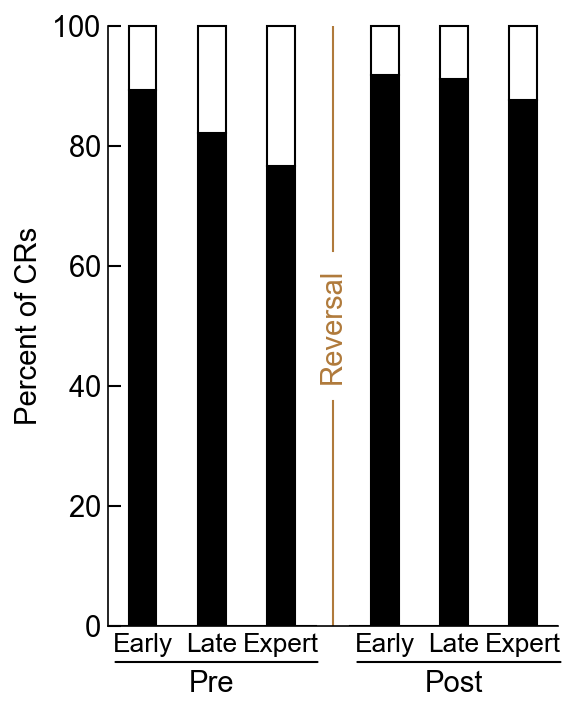

In [85]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

evoked_pc = 100 * FR_CR_evoked / (FR_CR_evoked+FR_CR_suppressed)
suppressed_pc = 100 * FR_CR_suppressed / (FR_CR_evoked+FR_CR_suppressed)

# ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], evoked_pc, color = '#A78889',label='Enhanced')
# ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], bottom=evoked_pc,height=suppressed_pc, color = '#686893',label='Suppressed')

ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], evoked_pc, width=0.4, fc='k',ec='k',label='Enhanced')
ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], suppressed_pc, bottom=evoked_pc, width=0.4,fc='white',ec='k',label='Suppressed',clip_on=False)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ax.set_ylim([0,100])
# ax.set_yticks([-100,-75,-50,-25,0,25,50,75,100])
# ax.set_yticklabels([100,75,50,25,0,25,50,75,100])
ylab = ax.set_ylabel('Percent of CRs')

ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

ax.plot([ax.get_xlim()[0],2.5-switch_offset],[0,0],c='k',lw=1)
ax.plot([2.5+switch_offset,ax.get_xlim()[1]],[0,0],c='k',lw=1)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.0075, -stdyfrac), xycoords='axes fraction', xytext=(0.475, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.545, -stdyfrac), xycoords='axes fraction', xytext=(1.015, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

# lgd = ax.legend(frameon=False,loc=(1,0.9))

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent evoked stimulus V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

# Stim CR/NCR

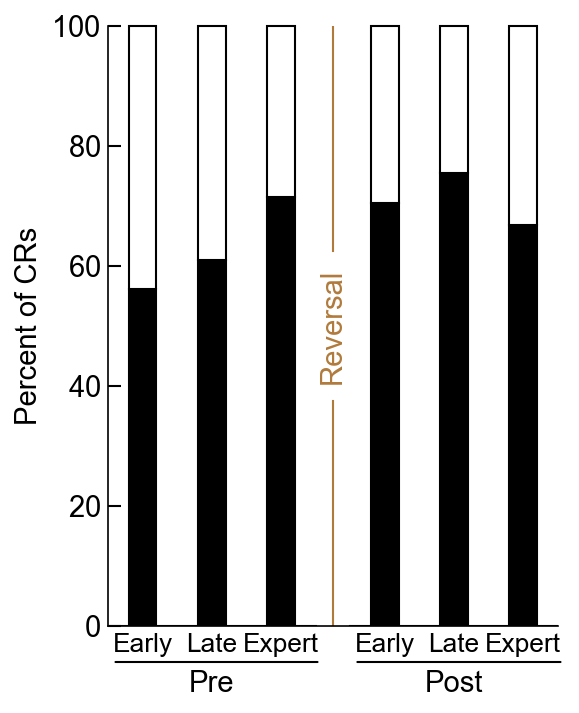

In [86]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

evoked_pc = 100 * FR_CR_choice_evoked / (FR_CR_choice_evoked+FR_CR_choice_suppressed)
suppressed_pc = 100 * FR_CR_choice_suppressed / (FR_CR_choice_evoked+FR_CR_choice_suppressed)

ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], evoked_pc, width=0.4, fc='k',ec='k',label='Enhanced')
ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], suppressed_pc, bottom=evoked_pc, width=0.4,fc='white',ec='k',label='Suppressed',clip_on=False)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ax.set_ylim([0,100])
# ax.set_yticks([-100,-75,-50,-25,0,25,50,75,100])
# ax.set_yticklabels([100,75,50,25,0,25,50,75,100])
ylab = ax.set_ylabel('Percent of CRs')
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.0075, -stdyfrac), xycoords='axes fraction', xytext=(0.475, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.545, -stdyfrac), xycoords='axes fraction', xytext=(1.015, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.plot([ax.get_xlim()[0],2.5-switch_offset],[0,0],c='k',lw=1)
ax.plot([2.5+switch_offset,ax.get_xlim()[1]],[0,0],c='k',lw=1)

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

# lgd = ax.legend(frameon=False,loc=(1,0.9))

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent evoked choice V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

# Pie Charts

# All Cells

148
187
97
306
342
247


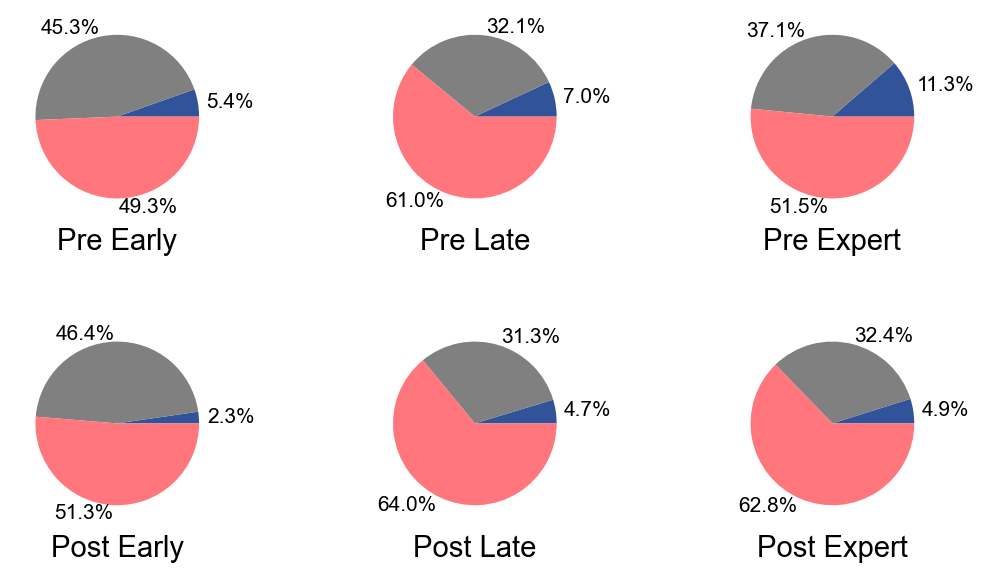

In [16]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],hspace=0.5)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)

################################################################################################################

size = 20
summary_size=100
summary_width=1#0.75

mn = 3.5
spread = 2.5

############

pies = []
for idx,(ax,enh,sup,ncr) in enumerate(zip(axs,FR_CR_evoked,FR_CR_suppressed,FR_NCR)):    
    tot = enh+sup+ncr
    print(tot)
    enh = enh / tot * 100
    sup = sup / tot * 100
    ncr = ncr / tot * 100
    fracs = np.array([sup,enh,ncr])
    labs = ['Suppressed','Enhanced','NCRs']
    pies.append(ax.pie(fracs,colors=['#315399',CR_COLOR,NCR_COLOR],labels=[f"{np.around(fr,1)}%" for fr,l in zip(fracs,labs)],explode=[0]*3))#.075]*3))

################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[idx])
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass

#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [t for t in np.concatenate([p[1] for p in pies])]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC enhanced suppressed pie over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

# TEs

37
51
50
93
137
80


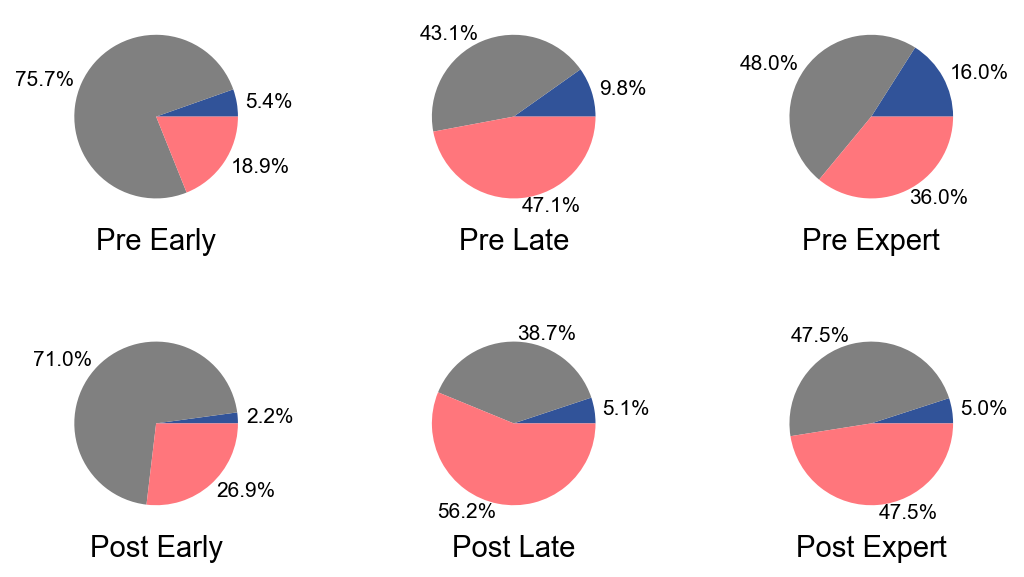

In [15]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],hspace=0.5)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)

################################################################################################################

size = 20
summary_size=100
summary_width=1#0.75

mn = 3.5
spread = 2.5

############

pies = []
for idx,(ax,enh,sup,ncr) in enumerate(zip(axs,FR_CR_evoked,FR_CR_suppressed,FR_NCR)):    
    tot = enh+sup+ncr
    print(tot)
    enh = enh / tot * 100
    sup = sup / tot * 100
    ncr = ncr / tot * 100
    fracs = np.array([sup,enh,ncr])
    labs = ['Suppressed','Enhanced','NCRs']
    pies.append(ax.pie(fracs,colors=['#315399',CR_COLOR,NCR_COLOR],labels=[f"{np.around(fr,1)}%" for fr,l in zip(fracs,labs)]))#,explode=[0.075]*3))

################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[idx])
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass

#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [t for t in np.concatenate([p[1] for p in pies])]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC enhanced suppressed TEs pie over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [ ]:
37
51
50
93
137
80

# CR NCR Overlap

In [113]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no behavior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 728/728 [00:11<00:00, 60.72it/s] 


In [114]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1830/1830 [00:30<00:00, 59.42it/s] 

errors for: []


In [118]:
FR_CR_CR = [0,0,0,0,0,0]
FR_CR_NCR = [0,0,0,0,0,0]
FR_NCR_CR = [0,0,0,0,0,0]
FR_NCR_NCR = [0,0,0,0,0,0]

CR_NCR_StimThresh = 3.5#2.9034419036315477
CR_NCR_ChoiceThresh = 0.8308610286728099#1.1059872908523893

cellstouseFR = 'all cells'
#cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
            
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        FRbl = sessionfile.responsiveness[clust]['all_trials'].FRbaseline
        FR = sessionfile.responsiveness[clust]['all_trials'].FR
    except Exception as e:
        print(f"stim: {e}")
        FRmod = np.nan
        FRbl = np.nan
        FR = np.nan
    try:
        ChoiceMod = np.abs(sessionfile.responsiveness[clust]['all_trials'].FRmodulation_choice)
        FR_choice = sessionfile.responsiveness[clust]['all_trials'].FR_choice
    except Exception as e:
        print(f"choice: {e}")
        ChoiceMod = np.nan
        FR_choice = np.nan
        
        
        
    if EILphases[idx] == 'pre early':
        if FRmod >= CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_CR_CR[0] += 1
        elif FRmod >= CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_CR_NCR[0] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_NCR_CR[0] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_NCR[0] += 1
            
    elif EILphases[idx] == 'pre late':
        if FRmod >= CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_CR_CR[1] += 1
        elif FRmod >= CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_CR_NCR[1] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_NCR_CR[1] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_NCR[1] += 1
        
    elif EILphases[idx] == 'pre expert':
        if FRmod >= CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_CR_CR[2] += 1
        elif FRmod >= CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_CR_NCR[2] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_NCR_CR[2] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_NCR[2] += 1
        
    elif EILphases[idx] == 'post early':
        if FRmod >= CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_CR_CR[3] += 1
        elif FRmod >= CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_CR_NCR[3] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_NCR_CR[3] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_NCR[3] += 1
        
    elif EILphases[idx] == 'post late':
        if FRmod >= CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_CR_CR[4] += 1
        elif FRmod >= CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_CR_NCR[4] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_NCR_CR[4] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_NCR[4] += 1
        
    elif EILphases[idx] == 'post expert':
        if FRmod >= CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_CR_CR[5] += 1
        elif FRmod >= CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_CR_NCR[5] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod >= CR_NCR_ChoiceThresh:
            FR_NCR_CR[5] += 1
        elif FRmod < CR_NCR_StimThresh and ChoiceMod < CR_NCR_ChoiceThresh:
            FR_NCR_NCR[5] += 1
            
FR_CR_CR = np.array(FR_CR_CR)
FR_CR_NCR = np.array(FR_CR_NCR)
FR_NCR_CR = np.array(FR_NCR_CR)
FR_NCR_NCR = np.array(FR_NCR_NCR)

1388it [00:24, 54.08it/s] 

choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'


1402it [00:24, 55.16it/s]

choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodul

1419it [00:24, 66.98it/s]

choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
choice: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'


1830it [00:31, 58.16it/s] 


In [119]:
FR_CR_evoked
FR_CR_suppressed
FR_CR_choice_evoked
FR_CR_choice_suppressed
FR_NCR
FR_NCR_choice

[100, 87, 41, 193, 156, 105]

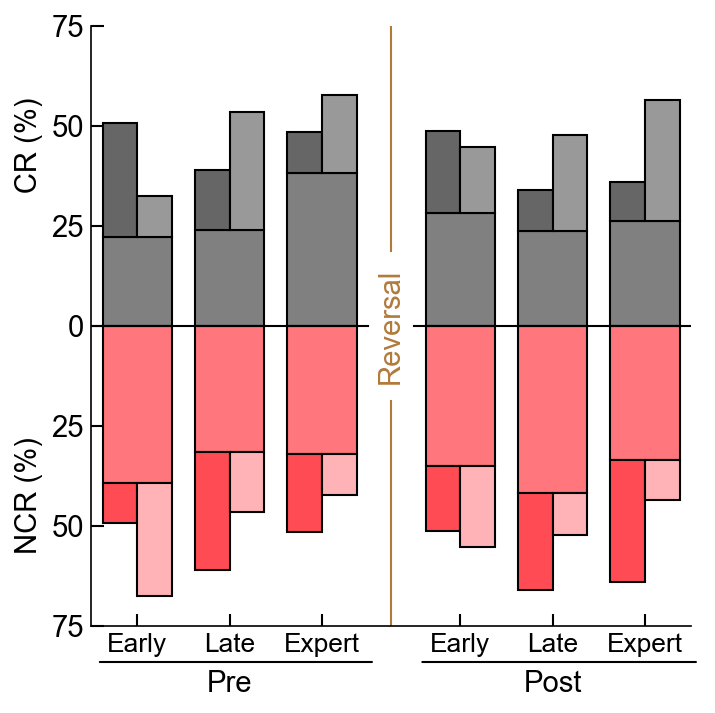

In [140]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(4, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

wid=0.75

# FR_CR_CR = np.array(FR_CR_CR)
# FR_CR_NCR = np.array(FR_CR_NCR)
# FR_NCR_CR = np.array(FR_NCR_CR)
# FR_NCR_NCR = np.array(FR_NCR_NCR)
totals = FR_CR_CR+FR_CR_NCR+FR_NCR_CR+FR_NCR_NCR

ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], FR_CR_CR/totals*100, width=wid, ec='k',fc = CR_COLOR,label='Combined CR', lw=1)
ax.bar(np.array([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])-wid/4, FR_CR_NCR/totals*100, bottom=FR_CR_CR/totals*100, width=wid/2, ec='k',fc = '#666666',label='Stim CR', lw=1)
ax.bar(np.array([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])+wid/4, FR_NCR_CR/totals*100, bottom=FR_CR_CR/totals*100, width=wid/2, ec='k',fc = '#999999',label='Choice CR', lw=1)

ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], -FR_NCR_NCR/totals*100, width=wid, ec='k',fc = NCR_COLOR,label='Combined NCR', lw=1)
ax.bar(np.array([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])-wid/4, -FR_NCR_CR/totals*100, bottom=-FR_NCR_NCR/totals*100, width=wid/2, ec='k',fc = '#FF4C54',label='Stim NCR', lw=1)
ax.bar(np.array([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])+wid/4, -FR_CR_NCR/totals*100, bottom=-FR_NCR_NCR/totals*100, width=wid/2, ec='k',fc = '#FFB3B6',label='Choice NCR', lw=1)



data = [ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert]
CR_CR_pc = [100 * np.mean(np.greater_equal(ilep.rmnan(d),0.8308610286728099)) for d in data]
NCR_NCR_pc = [-100 * np.mean(np.less(ilep.rmnan(d),0.8308610286728099)) for d in data]

# ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], CR_pc, width=0.4, color = CR_COLOR,label='CR')
# ax.bar([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset], NCR_pc, width=0.4, color = NCR_COLOR,label='NCR')

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ax.set_ylim([-75,75])
ax.set_yticks([-75,-50,-25,0,25,50,75])
ax.set_yticklabels([75,50,25,0,25,50,75])
ylab = ax.set_ylabel('NCR (%)                              CR (%)')

ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

ax.plot([ax.get_xlim()[0],2.5-switch_offset],[0,0],c='k',lw=1)
ax.plot([2.5+switch_offset,ax.get_xlim()[1]],[0,0],c='k',lw=1)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.0075, -stdyfrac), xycoords='axes fraction', xytext=(0.475, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.545, -stdyfrac), xycoords='axes fraction', xytext=(1.015, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

# lgd = ax.legend(frameon=False,loc=(1,0.9))

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent CRNCR combined V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [146]:
FR_NCR_NCR/totals

array([0.39189189, 0.31550802, 0.31958763, 0.3495702 , 0.4180602 ,
       0.33609959])

# Figures

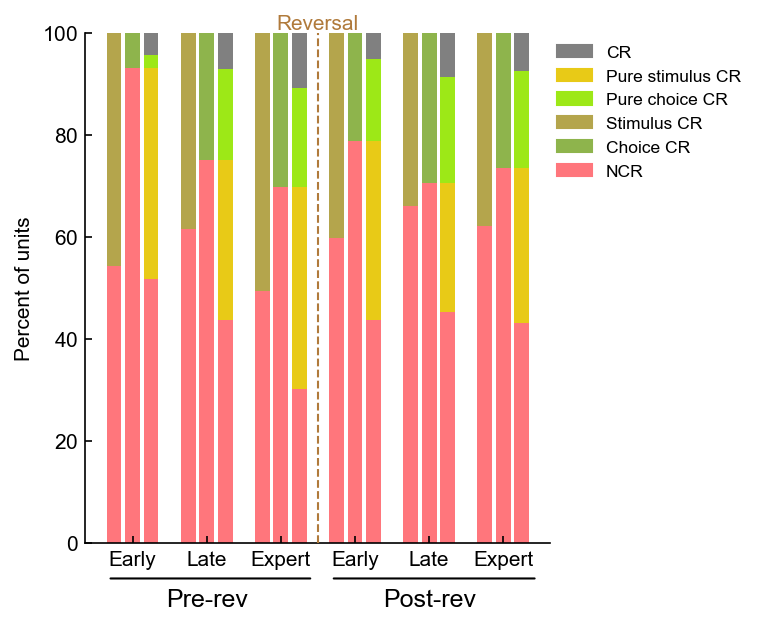

In [80]:
def colmean(A,B,weight=0.5):
    r,g,b = mpl.colors.to_rgb(A)
    r2,g2,b2 = mpl.colors.to_rgb(B)
    return mpl.colors.to_hex([r*weight+r2*(1-weight),g*weight+g2*(1-weight),b*weight+b2*(1-weight)])

FR_thresh = 3.5
Ramp_thresh = 0.5

FRmod_data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
RampingNorm_data = [RampingNorm_preearly,RampingNorm_prelate,RampingNorm_preexpert,RampingNorm_postearly,RampingNorm_postlate,RampingNorm_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']

fig, ax = plt.subplots(figsize=(4,4.5))
for idx,(FRmod_col,Ramp_col) in enumerate(zip(FRmod_data,RampingNorm_data)):
    FRmod,Ramp = ilep.paired_rmnan(FRmod_col,Ramp_col)
    Stim_CR_mask = np.greater(FRmod,FR_thresh)
    Choice_CR_mask = np.greater(Ramp,Ramp_thresh)
    
    width=0.6
    offset = 1.25
    
    Stim_CR = np.mean(Stim_CR_mask)*100
    Choice_CR = np.mean(Choice_CR_mask)*100
    
    weight = 1
    ax.bar(idx-width/3*offset, 100-Stim_CR, width/3, bottom=0,color=colmean(NCR_COLOR,STIM_COLOR,weight=weight))
    ax.bar(idx-width/3*offset, Stim_CR, width/3, bottom=100-Stim_CR,color=colmean(CR_COLOR,STIM_COLOR,weight=0.5))#=weight))
    
    ax.bar(idx, 100-Choice_CR, width/3, bottom=0,color=colmean(NCR_COLOR,CHOICE_COLOR,weight=weight))
    ax.bar(idx, Choice_CR, width/3, bottom=100-Choice_CR,color=colmean(CR_COLOR,CHOICE_COLOR,weight=0.5))#weight))
    
    Both_CR = np.mean(np.logical_and(Stim_CR_mask,Choice_CR_mask))*100
    Stim_Only_CR = np.mean(np.logical_and(Stim_CR_mask,np.logical_not(Choice_CR_mask)))*100
    Choice_Only_CR = np.mean(np.logical_and(np.logical_not(Stim_CR_mask),Choice_CR_mask))*100
    NCR = np.mean(np.logical_and(np.logical_not(Stim_CR_mask),np.logical_not(Choice_CR_mask)))*100
    
    ax.bar(idx+width/3*offset, NCR, width/3, bottom=0,color=NCR_COLOR)
    ax.bar(idx+width/3*offset, Stim_Only_CR, width/3, bottom=NCR,color=STIM_COLOR)
    ax.bar(idx+width/3*offset, Choice_Only_CR, width/3, bottom=NCR+Stim_Only_CR,color=CHOICE_COLOR)
    ax.bar(idx+width/3*offset, Both_CR, width/3, bottom=NCR+Stim_Only_CR+Choice_Only_CR,color=CR_COLOR)
    
ax.set_ylim([0,100])
ax.set_ylabel('Percent of units')

ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(labels)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
t1 = ax.text(xtick_pos_pre, -0.13304656298982956/1.5*100, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, -0.13304656298982956/1.5*100, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.045, -0.07), xycoords='axes fraction', xytext=(0.4925, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
ax.annotate('', xy=(0.525, -0.07), xycoords='axes fraction', xytext=(0.975, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

ax.fill_between([],[],color=CR_COLOR,label='CR')
ax.fill_between([],[],color=STIM_COLOR,label='Pure stimulus CR')
ax.fill_between([],[],color=CHOICE_COLOR,label='Pure choice CR')
ax.fill_between([],[],color=colmean(CR_COLOR,STIM_COLOR,weight=0.5),label='Stimulus CR')
ax.fill_between([],[],color=colmean(CR_COLOR,CHOICE_COLOR,weight=0.5),label='Choice CR')
ax.fill_between([],[],color=NCR_COLOR,label='NCR')
lgd = ax.legend(frameon=False,loc=(1,0.7))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Population Response Profile Statistics V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,t1,t2), bbox_inches='tight')
pass